In [1]:
# # Standard Libraries
# import os
# import re
# import subprocess
# import traceback
# import pickle
# import spacy
# from collections import Counter

# # Data Handling and Processing
# import pandas as pd
# import numpy as np
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# # Visualization
# import matplotlib.pyplot as plt
# import seaborn as sns  

# # Scikit-Learn: Preprocessing and Model Selection
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer

# # Scikit-Learn: Models
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from xgboost import XGBClassifier

# # Scikit-Learn: Evaluation Metrics
# from sklearn.metrics import (
#     accuracy_score,
#     confusion_matrix,
#     classification_report,
#     roc_auc_score
# )

# # Scikit-Learn: Class Weights
# from sklearn.utils.class_weight import compute_class_weight

# # Scikit-Learn: Feature Engineering
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics.pairwise import cosine_similarity


# # Imbalanced Data Handling
# from imblearn.combine import SMOTEENN

# # TensorFlow & Keras
# import tensorflow as tf
# from tensorflow.keras.models import Model, load_model
# from tensorflow.keras.layers import (
#     Input, Dense, Dropout, Concatenate, BatchNormalization
# )
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import (
#     EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# )
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Joblib (for saving/loading models)
# import joblib



In [1]:
# Standard Libraries
import os
import re
import subprocess
import traceback
import pickle
import spacy
from collections import Counter

# Data Handling and Processing
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns  

# Scikit-Learn: Preprocessing and Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Scikit-Learn: Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Scikit-Learn: Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# Scikit-Learn: Class Weights
from sklearn.utils.class_weight import compute_class_weight

# Scikit-Learn: Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity

# Transformers
from transformers import AutoModelForTokenClassification, AutoTokenizer
from transformers import pipeline   

# Imbalanced Data Handling
from imblearn.combine import SMOTEENN

# TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, Concatenate, BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Joblib (for saving/loading models)
import joblib

/opt/anaconda3/envs/new_dev/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the BioBERT model and tokenizer
model_name = "dmis-lab/biobert-base-cased-v1.1"
model = AutoModelForTokenClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at dmis-lab/biobert-base-cased-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
# Create the NER pipeline
nlp_ner = pipeline("ner", model=model, tokenizer=tokenizer)

Device set to use mps:0


In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/armandaraujo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# #read in .json file and convert to csv
# import json

# # Load the JSON file
# with open('Pivot_Resource/SQuAD_dataset.json', 'r') as file:
#     data = json.load(file)

# # Convert the JSON data to a pandas DataFrame
# df = pd.DataFrame(data)

# # Display the first few rows of the DataFrame
# df.head()



In [5]:
prognosis_df = pd.read_csv('Pivot_Resource/prognosis_df.csv')


In [6]:
# prognosis_df = pd.read_csv('Final_Final_Resources/prognosis_df.csv')


In [7]:
prognosis_df.head()

,Prognosis,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# #read in .json file and convert to csv
# import json

# # Load the JSON file
# with open('Pivot_Resource/HealthCareMagic-100k.json', 'r') as file:
#     data = json.load(file)

# # Convert the JSON data to a pandas DataFrame
# df = pd.DataFrame(data)

# # Display the first few rows of the DataFrame
# df.head()

In [9]:
# # save the dataframe to a csv file
# df.to_csv('Pivot_Resource/HealthCareMagic-100k.csv', index=False)


In [10]:
# healthCareMagic_df = pd.read_csv('Pivot_Resource/HealthCareMagic-100k.csv')


In [11]:
# healthCareMagic_df.head()

In [12]:
# # Set display options for full view
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)  # This will show full content of each cell
# pd.set_option('display.expand_frame_repr', False)  # Don't wrap long strings

# # Display the dataframe
# healthCareMagic_df.head(100)

In [13]:
# healthCareMagic_df.shape

In [14]:
cleanCareMagic_df = pd.read_csv('Pivot_Resource/cleaned_healthcare_data.csv')


In [15]:
def clean_text(text):
    """Clean and preprocess text data"""
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    # Remove special characters but keep essential punctuation
    text = re.sub(r'[^a-zA-Z0-9\s.,!?()-]', '', text)
    
    # Standardize some medical terms (add more as needed)
    text = text.replace('doc', 'doctor')
    text = text.replace('meds', 'medications')
    
    return text

In [16]:


# def prepare_dataset(df):
#     """Prepare the dataset for chatbot training"""
#     # Create a copy to avoid modifying original data
#     df_clean = df.copy()
    
#     # Remove rows where any of the important columns are empty
#     df_clean = df_clean.dropna(subset=['instruction', 'input', 'output'])
    
#     # Clean the text in each column
#     df_clean['instruction'] = df_clean['instruction'].apply(clean_text)
#     df_clean['input'] = df_clean['input'].apply(clean_text)
#     df_clean['output'] = df_clean['output'].apply(clean_text)
    
#     # Remove very short or empty responses
#     df_clean = df_clean[df_clean['input'].str.len() > 10]
#     df_clean = df_clean[df_clean['output'].str.len() > 10]
    
#     # Create a combined prompt format
#     df_clean['combined_input'] = df_clean.apply(
#         lambda x: f"{x['instruction']}\n\nPatient: {x['input']}\n\nDoctor:", axis=1
#     )
    
#     return df_clean

# # Apply the cleaning
# cleaned_df = prepare_dataset(healthCareMagic_df)

# # Display a sample to verify the cleaning
# print("Sample cleaned conversation:")
# print("\nCombined Input:")
# print(cleaned_df['combined_input'].iloc[0])
# print("\nOutput:")
# print(cleaned_df['output'].iloc[0])

# # Save cleaned dataset
# cleaned_df.to_csv('Pivot_Resource/cleaned_healthcare_data.csv', index=False)

# # Print some statistics
# print("\nDataset Statistics:")
# print(f"Original rows: {len(healthCareMagic_df)}")
# print(f"Cleaned rows: {len(cleaned_df)}")
# print(f"Average input length: {cleaned_df['input'].str.len().mean():.0f} characters")
# print(f"Average output length: {cleaned_df['output'].str.len().mean():.0f} characters")

In [17]:
# # Optional: Add more sophisticated cleaning
# nltk.download('punkt')

# def advanced_clean(df):
#     # Remove duplicate conversations
#     df = df.drop_duplicates(subset=['input', 'output'])
    
#     # Remove conversations where input and output are too similar
#     from difflib import SequenceMatcher
#     def similarity_ratio(row):
#         return SequenceMatcher(None, row['input'], row['output']).ratio()
    
#     df['similarity'] = df.apply(similarity_ratio, axis=1)
#     df = df[df['similarity'] < 0.8]  # Remove where input/output are too similar
#     df = df.drop('similarity', axis=1)
    
#     # Add conversation length features
#     df['input_word_count'] = df['input'].apply(lambda x: len(word_tokenize(x)))
#     df['output_word_count'] = df['output'].apply(lambda x: len(word_tokenize(x)))
    
#     # Filter out extremely long or short conversations
#     df = df[
#         (df['input_word_count'] >= 5) & 
#         (df['input_word_count'] <= 500) &
#         (df['output_word_count'] >= 5) & 
#         (df['output_word_count'] <= 500)
#     ]
    
#     return df

# # Apply advanced cleaning if needed
# cleaned_df = advanced_clean(cleaned_df)

In [18]:
# # Display random samples to verify quality
# print("Random sample of cleaned conversations:")
# random_samples = cleaned_df.sample(n=3)
# for idx, row in random_samples.iterrows():
#     print("\n---Conversation---")
#     print("Input:", row['combined_input'])
#     print("\nOutput:", row['output'])
#     print("\n")

In [19]:
def prepare_input(user_symptoms):
    """Prepare user input in the same format as training data"""
    instruction = "If you are a doctor, please answer the medical questions based on the patient's description."
    formatted_input = f"{instruction}\n\nPatient: {user_symptoms}\n\nDoctor:"
    return formatted_input


In [20]:
def get_medical_response(user_symptoms, model, input_tokenizer, output_tokenizer, maxlen_input=512):
    """Generate medical response for given symptoms"""
    try:
        # Prepare the input
        formatted_input = prepare_input(user_symptoms)
        
        # Tokenize and pad the input
        input_seq = input_tokenizer.texts_to_sequences([formatted_input])
        input_pad = pad_sequences(input_seq, maxlen=maxlen_input, padding='post')
        
        # Generate prediction
        predicted_seq = model.predict(input_pad, verbose=0)[0]
        
        # Convert prediction to text
        predicted_text = ""
        for idx in predicted_seq.argmax(axis=-1):
            if idx > 0:  # Skip padding
                word = output_tokenizer.index_word.get(idx, '')
                if word:
                    predicted_text += word + ' '
        
        # Clean up the response
        response = predicted_text.strip()
        
        # Add disclaimer
        disclaimer = ("\n\nNOTE: This is an AI-generated response and should not be considered "
                     "as professional medical advice. Please consult with a qualified healthcare "
                     "provider for proper diagnosis and treatment.")
        
        return response + disclaimer
    
    except Exception as e:
        return (f"I apologize, but I encountered an error processing your request. "
                f"Please consult with a healthcare provider. Error: {str(e)}")

# Create an interactive chat interface
def medical_chat():
    print("Medical Symptom Chatbot (Type 'quit' to exit)")
    print("Please describe your symptoms:")
    
    while True:
        user_input = input("\nYou: ")
        
        if user_input.lower() in ['quit', 'exit', 'bye']:
            print("\nThank you for using the Medical Symptom Chatbot. Take care!")
            break
            
        if len(user_input.strip()) < 10:
            print("\nBot: Please provide more details about your symptoms for a better assessment.")
            continue
            
        response = get_medical_response(user_input, model, input_tokenizer, output_tokenizer)
        print("\nBot:", response)

In [21]:
def preprocess_symptoms(symptoms):
    """Preprocess and validate symptom description"""
    # Convert to lowercase
    symptoms = symptoms.lower()
    
    # Remove extra whitespace
    symptoms = ' '.join(symptoms.split())
    
    # Basic spell checking could be added here
    
    # Remove any obvious non-medical terms (could be expanded)
    non_medical_terms = ['hi', 'hello', 'hey', 'thanks', 'thank you']
    symptoms = ' '.join(word for word in symptoms.split() 
                       if word not in non_medical_terms)
    
    return symptoms

In [22]:
def validate_input(symptoms):
    """Validate the input symptoms"""
    if len(symptoms.split()) < 3:
        return False, "Please provide more details about your symptoms."
    
    if len(symptoms) > 500:
        return False, "Please provide a more concise description of your symptoms."
    
    return True, ""

In [23]:
# Enhanced chat interface with input validation
def enhanced_medical_chat():
    print("\nMedical Symptom Chatbot")
    print("------------------------")
    print("Please describe your symptoms in detail.")
    print("Type 'quit' to exit.")
    print("\nImportant: This is an AI assistant and not a replacement for professional medical advice.")
    
    while True:
        try:
            user_input = input("\nYou: ").strip()
            
            if user_input.lower() in ['quit', 'exit', 'bye']:
                print("\nThank you for using the Medical Symptom Chatbot. Take care!")
                break
            
            # Preprocess input
            processed_input = preprocess_symptoms(user_input)
            
            # Validate input
            is_valid, message = validate_input(processed_input)
            if not is_valid:
                print(f"\nBot: {message}")
                continue
            
            # Get response
            response = get_medical_response(processed_input, model, input_tokenizer, output_tokenizer)
            
            print("\nBot:", response)
            
        except Exception as e:
            print("\nBot: I apologize, but I encountered an error. Please try again or seek medical attention if you're concerned.")
            print(f"Error: {str(e)}")

In [24]:
def check_emergency_symptoms(symptoms):
    """Check for emergency symptoms that require immediate medical attention"""
    emergency_keywords = [
        'chest pain', 'heart attack', 'stroke', 'unconscious', 'breathing difficulty',
        'severe bleeding', 'head injury', 'suicide', 'poisoning', 'overdose'
    ]
    
    for keyword in emergency_keywords:
        if keyword in symptoms.lower():
            return True
    return False

In [25]:
def get_emergency_message():
    return """
    EMERGENCY MEDICAL ATTENTION NEEDED
    ---------------------------------
    Based on the symptoms you've described, you should seek immediate medical attention:
    
    1. Call emergency services (911 in the US) or your local emergency number
    2. Go to the nearest emergency room
    3. Do not wait for symptoms to improve on their own
    
    This is not a situation for an AI chatbot. Please seek professional medical help immediately.
    """

In [26]:
# Enhanced chat interface with emergency detection
def safe_medical_chat():
    print("\nMedical Symptom Chatbot")
    print("------------------------")
    print("DISCLAIMER: This chatbot is for informational purposes only and is not a substitute for professional medical advice, diagnosis, or treatment.")
    print("In case of emergency, please call your local emergency services immediately.")
    print("\nPlease describe your symptoms (type 'quit' to exit):")
    
    while True:
        try:
            user_input = input("\nYou: ").strip()
            
            if user_input.lower() in ['quit', 'exit', 'bye']:
                print("\nThank you for using the Medical Symptom Chatbot. Remember to consult with healthcare professionals for proper medical advice.")
                break
            
            # Check for emergencies first
            if check_emergency_symptoms(user_input):
                print(get_emergency_message())
                continue
            
            # Regular processing
            processed_input = preprocess_symptoms(user_input)
            is_valid, message = validate_input(processed_input)
            
            if not is_valid:
                print(f"\nBot: {message}")
                continue
            
            response = get_medical_response(processed_input, model, input_tokenizer, output_tokenizer)
            print("\nBot:", response)
            
        except Exception as e:
            print("\nBot: I apologize, but I encountered an error. Please try again or consult with a healthcare provider.")
            print(f"Error: {str(e)}")

In [27]:
# # Save the model and tokenizers
# model.save('medical_chatbot_model.h5')
# with open('input_tokenizer.pkl', 'wb') as f:
#     pickle.dump(input_tokenizer, f)
# with open('output_tokenizer.pkl', 'wb') as f:
#     pickle.dump(output_tokenizer, f)

# # Start the chat interface
# safe_medical_chat()

In [28]:
# Set display options for full view
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)  # This will show full content of each cell
pd.set_option('display.expand_frame_repr', False)  # Don't wrap long strings

# Display the dataframe
cleanCareMagic_df.head()

,instruction,input,output,combined_input
0,"if you are a doctortor, please answer the medical questions based on the patients description.","i woke up this morning feeling the whole room is spinning when i was sitting down. i went to the bathroom walking unsteadily, as i tried to focus i feel nauseous. i try to vomit but it wont come out.. after taking panadol and sleep for few hours, i still feel the same.. by the way, if i lay down or sit down, my head do not spin, only when i want to move around then i feel the whole world is spinning.. and it is normal stomach discomfort at the same time? earlier after i relieved myself, the spinning lessen so i am not sure whether its connected or coincidences.. thank you doctor!","hi, thank you for posting your query. the most likely cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo. in this condition, the most common symptom is dizziness or giddiness, which is made worse with movements. accompanying nausea and vomiting are common. the condition is due to problem in the ear, and improves in a few days on own. betahistine tablets would help relieve your symptoms. doing vestibular rehabilitation or adaptation exercises would prevent the recurrence of these symptoms. an ent evaluation would also help. i hope it helps. best wishes, chat doctortor.","if you are a doctortor, please answer the medical questions based on the patients description.\n\nPatient: i woke up this morning feeling the whole room is spinning when i was sitting down. i went to the bathroom walking unsteadily, as i tried to focus i feel nauseous. i try to vomit but it wont come out.. after taking panadol and sleep for few hours, i still feel the same.. by the way, if i lay down or sit down, my head do not spin, only when i want to move around then i feel the whole world is spinning.. and it is normal stomach discomfort at the same time? earlier after i relieved myself, the spinning lessen so i am not sure whether its connected or coincidences.. thank you doctor!\n\nDoctor:"
1,"if you are a doctortor, please answer the medical questions based on the patients description.",my baby has been pooing 5-6 times a day for a week. in the last few days it has increased to 7 and they are very watery with green stringy bits in them. he does not seem unwell i.e no temperature and still eating. he now has a very bad nappy rash from the pooing ...help!,hi... thank you for consulting in chat doctortor. it seems your kid is having viral diarrhea. once it starts it will take 5-7 days to completely get better. unless the kids having low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting...you need not worry. there is no need to use antibiotics unless there is blood in the motion. antibiotics might worsen if unnecessarily used causing antibiotic associated diarrhea. i suggest you use zinc supplements (zd chat doctortor.,"if you are a doctortor, please answer the medical questions based on the patients description.\n\nPatient: my baby has been pooing 5-6 times a day for a week. in the last few days it has increased to 7 and they are very watery with green stringy bits in them. he does not seem unwell i.e no temperature and still eating. he now has a very bad nappy rash from the pooing ...help!\n\nDoctor:"
2,"if you are a doctortor, please answer the medical questions based on the patients description.","hello, my husband is taking oxycodone due to a broken legsurgery. he has been taking this pain medication for one month. we are trying to conceive our second baby. will this medication afect the fetus? or the health of the baby? or can it bring birth defects? thank you.","hello, and i hope i can help you today.first, there is no medication that can be taken by the father that has any way to get into your system or a baby if you conceive. medications can only affect a fetus if you take it while pregnant. the only issue is that certain medications may decr

In [29]:

def extract_medical_conditions():
    """Create a list of common medical conditions/diseases"""
    common_conditions = [
        'vertigo', 'migraine', 'diabetes', 'hypertension', 'anxiety',
        'depression', 'asthma', 'bronchitis', 'pneumonia', 'arthritis',
        'gastritis', 'ulcer', 'infection', 'inflammation', 'sinusitis',
        'allergies', 'flu', 'covid', 'insomnia', 'anemia'
    ]
    return common_conditions

In [30]:
def enhance_medical_condition_extraction(text):
    """Enhanced medical condition extraction using patterns and keywords"""
    if not isinstance(text, str):
        return []
        
    diagnostic_patterns = [
        r'diagnosed with ([^.]*)',
        r'suffering from ([^.]*)',
        r'symptoms of ([^.]*)',
        r'indicates ([^.]*)',
        r'suggests ([^.]*)',
        r'likely ([^.]*)',
        r'appears to be ([^.]*)',
        r'consistent with ([^.]*)',
        r'pointing towards ([^.]*)',
        r'diagnosis of ([^.]*)'
    ]
    
    text = text.lower()
    found_conditions = []
    
    for pattern in diagnostic_patterns:
        matches = re.findall(pattern, text)
        found_conditions.extend(matches)
    
    # Also check for common conditions
    for condition in extract_medical_conditions():
        if re.search(r'\b' + condition + r'\b', text):
            found_conditions.append(condition)
    
    found_conditions = [
        condition.strip()
        for condition in found_conditions
        if len(condition.strip()) > 3
    ]
    
    return list(set(found_conditions))  # Remove duplicates

In [31]:
# def analyze_all_prognoses(df):
#     """Analyze and display all prognoses from the healthcare dataset"""
    
#     # Apply the medical condition extraction to both input and output
#     df['input_conditions'] = df['input'].apply(enhance_medical_condition_extraction)
#     df['output_conditions'] = df['output'].apply(enhance_medical_condition_extraction)
    
#     # Combine conditions and create a prognosis summary
#     df['all_conditions'] = df.apply(lambda x: list(set(x['input_conditions'] + x['output_conditions'])), axis=1)
    
#     # Create a flat list of all conditions
#     all_conditions = [cond for conditions in df['all_conditions'] for cond in conditions]
#     condition_counts = Counter(all_conditions)
    
#     # Calculate statistics
#     total_cases = len(df)
#     unique_conditions = len(condition_counts)
#     avg_conditions_per_case = sum(len(conditions) for conditions in df['all_conditions']) / total_cases
    
#     # Print summary
#     print("\nComplete Prognosis Analysis")
#     print("-" * 50)
#     print(f"Total cases analyzed: {total_cases}")
#     print(f"Unique conditions found: {unique_conditions}")
#     print(f"Average conditions per case: {avg_conditions_per_case:.2f}")
    
#     print("\nAll Conditions (sorted by frequency):")
#     print("-" * 50)
#     print(f"{'Condition':<40} {'Count':>8} {'Percentage':>12}")
#     print("-" * 62)
    
#     # Display all conditions
#     for condition, count in sorted(condition_counts.items(), key=lambda x: x[1], reverse=True):
#         percentage = (count / total_cases) * 100
#         print(f"{condition:<40} {count:>8} {percentage:>11.1f}%")
    
#     return condition_counts

# # Run the analysis
# prognosis_summary = analyze_all_prognoses(cleanCareMagic_df)

# # Create a full visualization (you might need to adjust figure size based on number of conditions)
# plt.figure(figsize=(20, 12))
# conditions = dict(Counter(prognosis_summary))
# plt.bar(range(len(conditions)), list(conditions.values()))
# plt.xticks(range(len(conditions)), list(conditions.keys()), rotation=90)
# plt.title('All Medical Conditions Frequency Distribution')
# plt.xlabel('Condition')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()


Prognosis Analysis Summary
--------------------------------------------------
Total cases analyzed: 112150
Unique conditions found: 26555
Average conditions per case: 0.81

Top 20 Most Common Conditions:
--------------------------------------------------
infection: 23116 cases (20.6%)
anxiety: 6738 cases (6.0%)
inflammation: 5254 cases (4.7%)
diabetes: 3463 cases (3.1%)
asthma: 2847 cases (2.5%)
depression: 2743 cases (2.4%)
anemia: 2453 cases (2.2%)
bronchitis: 2401 cases (2.1%)
hypertension: 2026 cases (1.8%)
allergies: 1906 cases (1.7%)
arthritis: 1693 cases (1.5%)
pneumonia: 1689 cases (1.5%)
gastritis: 1451 cases (1.3%)
ulcer: 1415 cases (1.3%)
sinusitis: 717 cases (0.6%)
migraine: 623 cases (0.6%)
vertigo: 559 cases (0.5%)
insomnia: 246 cases (0.2%)
in your case: 119 cases (0.1%)
chronic backache: 109 cases (0.1%)


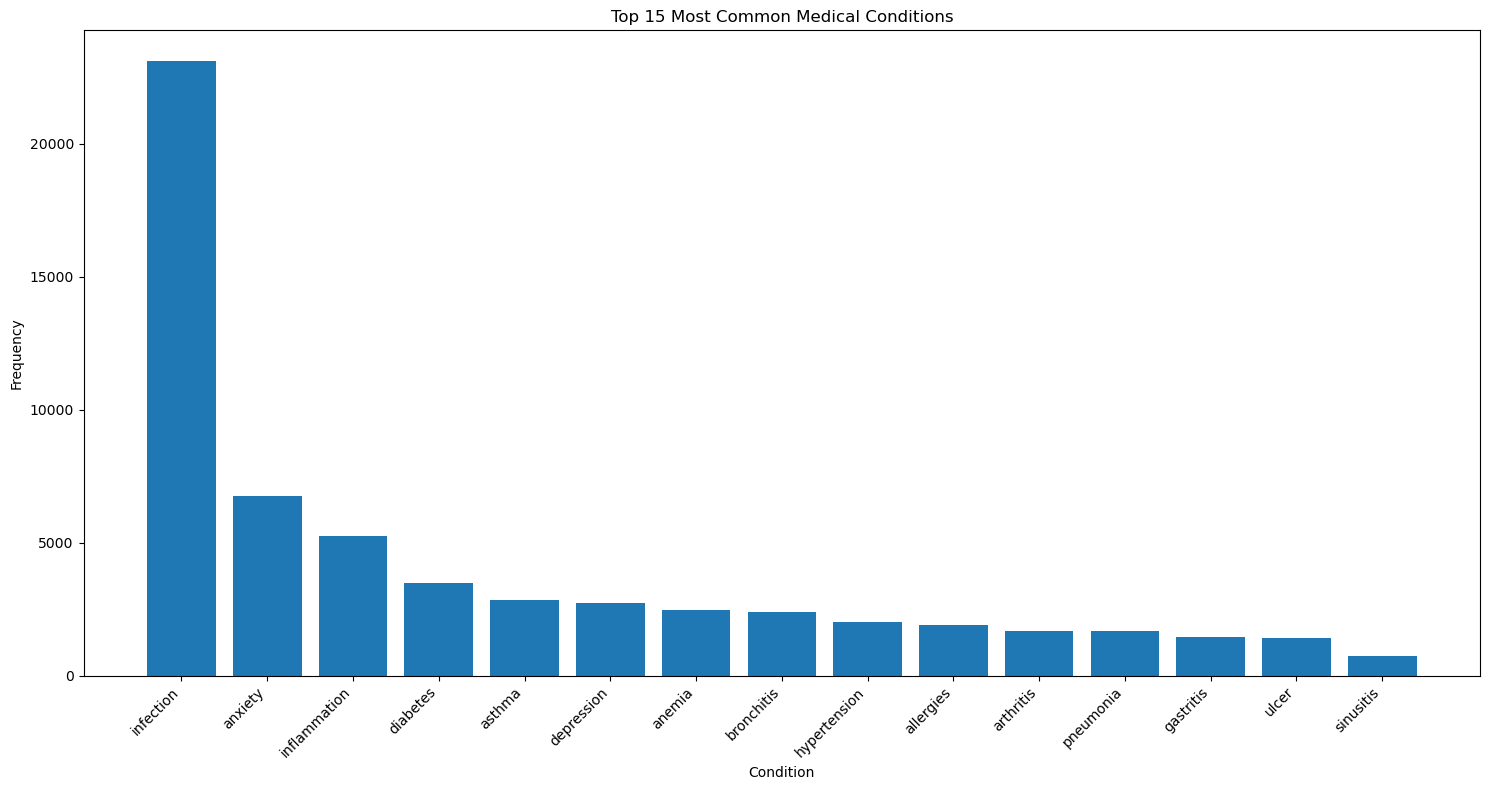

In [32]:
# Create a function to analyze and summarize prognoses
def analyze_prognoses(df):
    """Analyze and summarize prognoses from the healthcare dataset"""
    
    # Apply the medical condition extraction to both input and output
    df['input_conditions'] = df['input'].apply(enhance_medical_condition_extraction)
    df['output_conditions'] = df['output'].apply(enhance_medical_condition_extraction)
    
    # Combine conditions and create a prognosis summary
    df['all_conditions'] = df.apply(lambda x: list(set(x['input_conditions'] + x['output_conditions'])), axis=1)
    
    # Create a flat list of all conditions
    all_conditions = [cond for conditions in df['all_conditions'] for cond in conditions]
    condition_counts = Counter(all_conditions)
    
    # Calculate some statistics
    total_cases = len(df)
    unique_conditions = len(condition_counts)
    avg_conditions_per_case = sum(len(conditions) for conditions in df['all_conditions']) / total_cases
    
    # Print summary
    print("\nPrognosis Analysis Summary")
    print("-" * 50)
    print(f"Total cases analyzed: {total_cases}")
    print(f"Unique conditions found: {unique_conditions}")
    print(f"Average conditions per case: {avg_conditions_per_case:.2f}")
    
    print("\nTop 20 Most Common Conditions:")
    print("-" * 50)
    for condition, count in condition_counts.most_common(20):
        percentage = (count / total_cases) * 100
        print(f"{condition}: {count} cases ({percentage:.1f}%)")
    
    return condition_counts

# Run the analysis
prognosis_summary = analyze_prognoses(cleanCareMagic_df)

# Optional: Create a visualization of top conditions
plt.figure(figsize=(15, 8))
top_conditions = dict(Counter(prognosis_summary).most_common(15))
plt.bar(top_conditions.keys(), top_conditions.values())
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Most Common Medical Conditions')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [33]:
# display the dataframe 
cleanCareMagic_df.head(20)

,instruction,input,output,combined_input,input_conditions,output_conditions,all_conditions
0,"if you are a doctortor, please answer the medical questions based on the patients description.","i woke up this morning feeling the whole room is spinning when i was sitting down. i went to the bathroom walking unsteadily, as i tried to focus i feel nauseous. i try to vomit but it wont come out.. after taking panadol and sleep for few hours, i still feel the same.. by the way, if i lay down or sit down, my head do not spin, only when i want to move around then i feel the whole world is spinning.. and it is normal stomach discomfort at the same time? earlier after i relieved myself, the spinning lessen so i am not sure whether its connected or coincidences.. thank you doctor!","hi, thank you for posting your query. the most likely cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo. in this condition, the most common symptom is dizziness or giddiness, which is made worse with movements. accompanying nausea and vomiting are common. the condition is due to problem in the ear, and improves in a few days on own. betahistine tablets would help relieve your symptoms. doing vestibular rehabilitation or adaptation exercises would prevent the recurrence of these symptoms. an ent evaluation would also help. i hope it helps. best wishes, chat doctortor.","if you are a doctortor, please answer the medical questions based on the patients description.\n\nPatient: i woke up this morning feeling the whole room is spinning when i was sitting down. i went to the bathroom walking unsteadily, as i tried to focus i feel nauseous. i try to vomit but it wont come out.. after taking panadol and sleep for few hours, i still feel the same.. by the way, if i lay down or sit down, my head do not spin, only when i want to move around then i feel the whole world is spinning.. and it is normal stomach discomfort at the same time? earlier after i relieved myself, the spinning lessen so i am not sure whether its connected or coincidences.. thank you doctor!\n\nDoctor:",[],"[vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo]","[vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo]"
1,"if you are a doctortor, please answer the medical questions based on the patients description.",my baby has been pooing 5-6 times a day for a week. in the last few days it has increased to 7 and they are very watery with green stringy bits in them. he does not seem unwell i.e no temperature and still eating. he now has a very bad nappy rash from the pooing ...help!,hi... thank you for consulting in chat doctortor. it seems your kid is having viral diarrhea. once it starts it will take 5-7 days to completely get better. unless the kids having low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting...you need not worry. there is no need to use antibiotics unless there is blood in the motion. antibiotics might worsen if unnecessarily used causing antibiotic associated diarrhea. i suggest you use zinc supplements (zd chat doctortor.,"if you are a doctortor, please answer the medical questions based on the patients description.\n\nPatient: my baby has been pooing 5-6 times a day for a week. in the last few days it has increased to 7 and they are very watery with green stringy bits in them. he does not seem unwell i.e no temperature and still eating. he now has a very bad nappy rash from the pooing ...help!\n\nDoctor:",[],[],[]
2,"if you are a doctortor, please answer the medical questions based on the patients description.","hello, my husband is taking oxycodone due to a broken legsurgery. he has been taking this pain medication for one month. we are trying to conceive our second baby. will this medication afect the fetus? or the health of the baby? or can it bring birth defects? thank you.

In [34]:

def create_enhanced_prognosis_column(df):
    """Create an enhanced prognosis column with better condition extraction"""
    prognoses = []
    confidence_scores = []
    
    for _, row in df.iterrows():
        output_conditions = enhance_medical_condition_extraction(row['output'])
        input_conditions = enhance_medical_condition_extraction(row['input'])
        
        all_conditions = list(set(output_conditions + input_conditions))
        
        if all_conditions:
            confidence = len(output_conditions) / (len(all_conditions) + 1)
            prognosis = ', '.join(all_conditions[:3])
        else:
            confidence = 0.0
            prognosis = 'unspecified'
            
        prognoses.append(prognosis)
        confidence_scores.append(confidence)
    
    df['prognosis'] = prognoses
    df['prognosis_confidence'] = confidence_scores
    
    return df

In [35]:
# display the dataframe
enhanced_df = create_enhanced_prognosis_column(cleanCareMagic_df)
enhanced_df.head()

,instruction,input,output,combined_input,input_conditions,output_conditions,all_conditions,prognosis,prognosis_confidence
0,"if you are a doctortor, please answer the medical questions based on the patients description.","i woke up this morning feeling the whole room is spinning when i was sitting down. i went to the bathroom walking unsteadily, as i tried to focus i feel nauseous. i try to vomit but it wont come out.. after taking panadol and sleep for few hours, i still feel the same.. by the way, if i lay down or sit down, my head do not spin, only when i want to move around then i feel the whole world is spinning.. and it is normal stomach discomfort at the same time? earlier after i relieved myself, the spinning lessen so i am not sure whether its connected or coincidences.. thank you doctor!","hi, thank you for posting your query. the most likely cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo. in this condition, the most common symptom is dizziness or giddiness, which is made worse with movements. accompanying nausea and vomiting are common. the condition is due to problem in the ear, and improves in a few days on own. betahistine tablets would help relieve your symptoms. doing vestibular rehabilitation or adaptation exercises would prevent the recurrence of these symptoms. an ent evaluation would also help. i hope it helps. best wishes, chat doctortor.","if you are a doctortor, please answer the medical questions based on the patients description.\n\nPatient: i woke up this morning feeling the whole room is spinning when i was sitting down. i went to the bathroom walking unsteadily, as i tried to focus i feel nauseous. i try to vomit but it wont come out.. after taking panadol and sleep for few hours, i still feel the same.. by the way, if i lay down or sit down, my head do not spin, only when i want to move around then i feel the whole world is spinning.. and it is normal stomach discomfort at the same time? earlier after i relieved myself, the spinning lessen so i am not sure whether its connected or coincidences.. thank you doctor!\n\nDoctor:",[],"[vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo]","[vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo]","vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo",0.666667
1,"if you are a doctortor, please answer the medical questions based on the patients description.",my baby has been pooing 5-6 times a day for a week. in the last few days it has increased to 7 and they are very watery with green stringy bits in them. he does not seem unwell i.e no temperature and still eating. he now has a very bad nappy rash from the pooing ...help!,hi... thank you for consulting in chat doctortor. it seems your kid is having viral diarrhea. once it starts it will take 5-7 days to completely get better. unless the kids having low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting...you need not worry. there is no need to use antibiotics unless there is blood in the motion. antibiotics might worsen if unnecessarily used causing antibiotic associated diarrhea. i suggest you use zinc supplements (zd chat doctortor.,"if you are a doctortor, please answer the medical questions based on the patients description.\n\nPatient: my baby has been pooing 5-6 times a day for a week. in the last few days it has increased to 7 and they are very watery with green stringy bits in them. he does not seem unwell i.e no temperature and still eating. he now has a very bad nappy rash from the pooing ...help!\n\nDoctor:",[],[],[],unspecified,0.000000
2,"if you are a doctortor, please answer the medical questions based on the patients description.","hello, my husband is taking oxycodone due to a broken legsurgery. he has been taking this pain me

In [36]:
# list the number of unspecified prognoses in the prognosis column
unspecified_prognoses = enhanced_df[enhanced_df['prognosis'] == 'unspecified']
print(f"Total unspecified prognoses: {len(unspecified_prognoses)}")


Total unspecified prognoses: 51785


In [37]:
# display rows with unspecified prognoses
unspecified_prognoses.head(20)

,instruction,input,output,combined_input,input_conditions,output_conditions,all_conditions,prognosis,prognosis_confidence
1,"if you are a doctortor, please answer the medical questions based on the patients description.",my baby has been pooing 5-6 times a day for a week. in the last few days it has increased to 7 and they are very watery with green stringy bits in them. he does not seem unwell i.e no temperature and still eating. he now has a very bad nappy rash from the pooing ...help!,hi... thank you for consulting in chat doctortor. it seems your kid is having viral diarrhea. once it starts it will take 5-7 days to completely get better. unless the kids having low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting...you need not worry. there is no need to use antibiotics unless there is blood in the motion. antibiotics might worsen if unnecessarily used causing antibiotic associated diarrhea. i suggest you use zinc supplements (zd chat doctortor.,"if you are a doctortor, please answer the medical questions based on the patients description.\n\nPatient: my baby has been pooing 5-6 times a day for a week. in the last few days it has increased to 7 and they are very watery with green stringy bits in them. he does not seem unwell i.e no temperature and still eating. he now has a very bad nappy rash from the pooing ...help!\n\nDoctor:",[],[],[],unspecified,0.0
2,"if you are a doctortor, please answer the medical questions based on the patients description.","hello, my husband is taking oxycodone due to a broken legsurgery. he has been taking this pain medication for one month. we are trying to conceive our second baby. will this medication afect the fetus? or the health of the baby? or can it bring birth defects? thank you.","hello, and i hope i can help you today.first, there is no medication that can be taken by the father that has any way to get into your system or a baby if you conceive. medications can only affect a fetus if you take it while pregnant. the only issue is that certain medications may decrease a men sperm count and affect fertility, however pain medications like oxycodone do not have this effect. so there is no reason for you to worry about conceiving while taking this medication. the best way you can prepare for a healthy pregnancy is to follow a well-balanced diet, limit alcohol consumption and avoid cigarette smoke, and take a daily prenatal vitamin or folic acid, as folic acid supplements in early pregnancy helps to prevent certain types of birth defects. i hope this answers your question and best wishes for your upcoming pregnancy,","if you are a doctortor, please answer the medical questions based on the patients description.\n\nPatient: hello, my husband is taking oxycodone due to a broken legsurgery. he has been taking this pain medication for one month. we are trying to conceive our second baby. will this medication afect the fetus? or the health of the baby? or can it bring birth defects? thank you.\n\nDoctor:",[],[],[],unspecified,0.0
5,"if you are a doctortor, please answer the medical questions based on the patients description.","i am f 38 in good shape work out (do triathlons) regular but have had back pain from different reasons throughout my life now i every so often wake up with severe lower back, hip pain for no reason. today the pain is almost taking my breathe away when i move. it is a dull pain when i am just lying down but the moment i make any sort of movement i have sharp and sometimes shooting pain down my legs.","hi, from history it seems that you might be having degenerative changes in your lower back spines giving pinched nerve pressure. there might be having osteomalacia or osteoporosis as well. go for x-ray lumbosacral region for osteoarthritis. physiotherapy like back extension exercises will be much helpful. take b1, b6, b!2 shots or medicine. take calcium, vitamin a and d supplements. ok and take care.","if you are a doctortor, please

In [38]:
def enhanced_medical_condition_extraction(text):
    """More aggressive medical condition extraction using expanded patterns and medical terminology"""
    if not isinstance(text, str):
        return []
    
    # Expanded diagnostic patterns
    diagnostic_patterns = [
        r'diagnosed (?:with|as) ([^.]*)',
        r'(?:suffering|complaining) (?:from|of) ([^.]*)',
        r'symptoms (?:of|indicate) ([^.]*)',
        r'(?:indicates|suggesting|suggests) ([^.]*)',
        r'(?:likely|possible|probable) ([^.]*)',
        r'(?:appears|seems) to (?:be|have) ([^.]*)',
        r'consistent with ([^.]*)',
        r'(?:signs|symptoms) (?:of|suggesting) ([^.]*)',
        r'(?:may|could|might) have ([^.]*)',
        r'(?:presenting|showed|showing) (?:with|as) ([^.]*)',
        r'(?:diagnosis|assessment|impression):?\s*([^.]*)',
        r'(?:condition|problem) (?:is|appears to be) ([^.]*)',
        r'(?:treated|managing|treatment) (?:for|of) ([^.]*)'
    ]
    
    # Expanded medical terminology
    medical_conditions = [
        'infection', 'inflammation', 'pain', 'disorder', 'disease', 'syndrome',
        'condition', 'injury', 'trauma', 'fracture', 'sprain', 'strain',
        'allergy', 'deficiency', 'dysfunction', 'impairment', 'lesion',
        'tumor', 'cancer', 'diabetes', 'hypertension', 'arthritis',
        'asthma', 'bronchitis', 'pneumonia', 'depression', 'anxiety',
        'migraine', 'insomnia', 'fatigue', 'vertigo', 'nausea',
        'diarrhea', 'constipation', 'fever', 'cough', 'headache'
    ]
    
    text = text.lower()
    found_conditions = []
    
    # Pattern matching
    for pattern in diagnostic_patterns:
        matches = re.findall(pattern, text)
        found_conditions.extend(matches)
    
    # Direct term matching
    for condition in medical_conditions:
        if re.search(r'\b' + condition + r'\b', text):
            found_conditions.append(condition)
    
    # Additional symptom-based extraction
    symptom_patterns = [
        r'(?:chronic|severe|acute|persistent) ([a-zA-Z\s]+)',
        r'(?:recurring|constant|intermittent) ([a-zA-Z\s]+)',
        r'(?:experiencing|having) ([a-zA-Z\s]+)',
        r'(?:complains of|reports) ([a-zA-Z\s]+)'
    ]
    
    for pattern in symptom_patterns:
        matches = re.findall(pattern, text)
        found_conditions.extend(matches)
    
    # Clean and filter results
    found_conditions = [
        condition.strip()
        for condition in found_conditions
        if len(condition.strip()) > 3 and not any(stop in condition.lower() 
        for stop in ['normal', 'negative', 'none', 'no', 'denied'])
    ]
    
    # Remove duplicates and standardize
    found_conditions = list(set(found_conditions))
    
    return found_conditions

# Function to reprocess unspecified rows
def reprocess_unspecified_prognoses(df):
    """Reprocess rows with unspecified prognoses using enhanced extraction"""
    # Create a mask for unspecified rows
    unspecified_mask = df['prognosis'] == 'unspecified'
    
    # Only process unspecified rows
    for idx in df[unspecified_mask].index:
        # Apply enhanced extraction to both input and output
        input_conditions = enhanced_medical_condition_extraction(df.loc[idx, 'input'])
        output_conditions = enhanced_medical_condition_extraction(df.loc[idx, 'output'])
        
        # Combine and deduplicate conditions
        all_conditions = list(set(input_conditions + output_conditions))
        
        # Update prognosis if conditions were found
        if all_conditions:
            df.loc[idx, 'prognosis'] = ', '.join(all_conditions[:3])  # Limit to top 3 conditions
            df.loc[idx, 'prognosis_confidence'] = len(output_conditions) / (len(all_conditions) + 1)
    
    return df

# Apply the enhanced processing
enhanced_df = reprocess_unspecified_prognoses(enhanced_df)

# Print statistics about the results
total_rows = len(enhanced_df)
unspecified_before = len(enhanced_df[enhanced_df['prognosis'] == 'unspecified'])
print(f"\nPrognosis Extraction Results:")
print(f"Total rows: {total_rows}")
print(f"Remaining unspecified: {unspecified_before}")
print(f"Percentage specified: {((total_rows - unspecified_before) / total_rows) * 100:.2f}%")

# Display a sample of previously unspecified rows that now have prognoses
print("\nSample of Newly Identified Prognoses:")
sample_rows = enhanced_df[
    (enhanced_df['prognosis'] != 'unspecified')
    & (enhanced_df['prognosis_confidence'] > 0)
].head(10)

for _, row in sample_rows.iterrows():
    print(f"\nInput: {row['input'][:100]}...")
    print(f"Prognosis: {row['prognosis']}")
    print(f"Confidence: {row['prognosis_confidence']:.2f}")


Prognosis Extraction Results:
Total rows: 112150
Remaining unspecified: 11529
Percentage specified: 89.72%

Sample of Newly Identified Prognoses:

Input: i woke up this morning feeling the whole room is spinning when i was sitting down. i went to the bat...
Prognosis: vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo
Confidence: 0.67

Input: my baby has been pooing 5-6 times a day for a week. in the last few days it has increased to 7 and t...
Prognosis: low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting, viral diarrhea, diarrhea
Confidence: 0.75

Input: hello, my husband is taking oxycodone due to a broken legsurgery. he has been taking this pain medic...
Prognosis: pain
Confidence: 0.50

Input: lump under left nipple and stomach pain (male) hi,i have recently noticed a few weeks ago a lump und...
Prognosis: ulcer
Confidence: 0.50

Input: i have a 5 month old baby who is very con

In [39]:
# Create a new DataFrame with enhanced prognosis extraction
def create_enhanced_prognosis_df(df):
    """Create a new DataFrame with enhanced prognosis extraction"""
    # Create a copy of the original DataFrame
    enhanced_df = df.copy()
    
    # Apply enhanced extraction to all rows
    print("Processing rows...")
    
    # Apply enhanced extraction and create new columns
    enhanced_df['extracted_conditions'] = enhanced_df.apply(
        lambda row: enhanced_medical_condition_extraction(str(row['input']) + " " + str(row['output'])), 
        axis=1
    )
    
    # Create prognosis column (joining multiple conditions with comma)
    enhanced_df['enhanced_prognosis'] = enhanced_df['extracted_conditions'].apply(
        lambda x: ', '.join(x) if x else 'unspecified'
    )
    
    # Add confidence score
    enhanced_df['confidence_score'] = enhanced_df['extracted_conditions'].apply(
        lambda x: len(x)/(len(x)+1) if x else 0.0
    )
    
    # Print summary statistics
    total_rows = len(enhanced_df)
    specified_rows = len(enhanced_df[enhanced_df['enhanced_prognosis'] != 'unspecified'])
    
    print("\nExtraction Summary:")
    print(f"Total rows processed: {total_rows}")
    print(f"Rows with identified conditions: {specified_rows}")
    print(f"Percentage with conditions: {(specified_rows/total_rows)*100:.2f}%")
    
    return enhanced_df

# Create the enhanced DataFrame
new_df = create_enhanced_prognosis_df(cleanCareMagic_df)

# Display sample of results
print("\nSample of Enhanced Prognosis Extraction:")
print(new_df[['input', 'output', 'enhanced_prognosis', 'confidence_score']].head(10))

# Optional: Save to CSV
# new_df.to_csv('enhanced_healthcare_data.csv', index=False)

Processing rows...

Extraction Summary:
Total rows processed: 112150
Rows with identified conditions: 99912
Percentage with conditions: 89.09%

Sample of Enhanced Prognosis Extraction:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        input                                                                                                                                                                                                                                  

Track or extract the most common word in summaries

Take output and for each output, determine the most common word

if no match, it is unknown

In [40]:
new_df.head(20)

,instruction,input,output,combined_input,input_conditions,output_conditions,all_conditions,prognosis,prognosis_confidence,extracted_conditions,enhanced_prognosis,confidence_score
0,"if you are a doctortor, please answer the medical questions based on the patients description.","i woke up this morning feeling the whole room is spinning when i was sitting down. i went to the bathroom walking unsteadily, as i tried to focus i feel nauseous. i try to vomit but it wont come out.. after taking panadol and sleep for few hours, i still feel the same.. by the way, if i lay down or sit down, my head do not spin, only when i want to move around then i feel the whole world is spinning.. and it is normal stomach discomfort at the same time? earlier after i relieved myself, the spinning lessen so i am not sure whether its connected or coincidences.. thank you doctor!","hi, thank you for posting your query. the most likely cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo. in this condition, the most common symptom is dizziness or giddiness, which is made worse with movements. accompanying nausea and vomiting are common. the condition is due to problem in the ear, and improves in a few days on own. betahistine tablets would help relieve your symptoms. doing vestibular rehabilitation or adaptation exercises would prevent the recurrence of these symptoms. an ent evaluation would also help. i hope it helps. best wishes, chat doctortor.","if you are a doctortor, please answer the medical questions based on the patients description.\n\nPatient: i woke up this morning feeling the whole room is spinning when i was sitting down. i went to the bathroom walking unsteadily, as i tried to focus i feel nauseous. i try to vomit but it wont come out.. after taking panadol and sleep for few hours, i still feel the same.. by the way, if i lay down or sit down, my head do not spin, only when i want to move around then i feel the whole world is spinning.. and it is normal stomach discomfort at the same time? earlier after i relieved myself, the spinning lessen so i am not sure whether its connected or coincidences.. thank you doctor!\n\nDoctor:",[],"[vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo]","[vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo]","vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo",0.666667,"[vertigo, nausea, due to problem in the ear, and improves in a few days on own, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo, condition]","vertigo, nausea, due to problem in the ear, and improves in a few days on own, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo, condition",0.833333
1,"if you are a doctortor, please answer the medical questions based on the patients description.",my baby has been pooing 5-6 times a day for a week. in the last few days it has increased to 7 and they are very watery with green stringy bits in them. he does not seem unwell i.e no temperature and still eating. he now has a very bad nappy rash from the pooing ...help!,hi... thank you for consulting in chat doctortor. it seems your kid is having viral diarrhea. once it starts it will take 5-7 days to completely get better. unless the kids having low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting...you need not worry. there is no need to use antibiotics unless there is blood in the motion. antibiotics might worsen if unnecessarily used causing antibiotic associated diarrhea. i suggest you use zinc supplements (zd chat doctortor.,"if you are a doctortor, please answer the medical questions based on the patients description.\n\nPatient: my baby has been pooing 5-6 times a day for a week. in th

In [41]:
# def get_most_common_word(row):
#     """Extract most common word from multiple condition columns"""
#     # Collect all words from relevant columns
#     all_words = []
    
#     # Handle list columns
#     if isinstance(row['output_conditions'], list):
#         all_words.extend([word.strip() for word in row['output_conditions']])
#     if isinstance(row['all_conditions'], list):
#         all_words.extend([word.strip() for word in row['all_conditions']])
    
#     # Handle string columns
#     if isinstance(row['prognosis'], str):
#         all_words.extend([word.strip() for word in row['prognosis'].split(',')])
#     if isinstance(row['enhanced_prognosis'], str):
#         all_words.extend([word.strip() for word in row['enhanced_prognosis'].split(',')])
#     if isinstance(row['extracted_conditions'], list):
#         all_words.extend([word.strip() for word in row['extracted_conditions']])
    
#     # Remove empty strings and standardize
#     all_words = [word.lower() for word in all_words if word and word.strip()]
    
#     # If no words found, return 'unknown'
#     if not all_words:
#         return 'unknown'
    
#     # Count word frequencies
#     word_counts = Counter(all_words)
    
#     # Get most common word
#     if word_counts:
#         return word_counts.most_common(1)[0][0]
#     return 'unknown'

# # Apply the function to create final_prognosis column
# new_df['final_prognosis'] = new_df.apply(get_most_common_word, axis=1)

# # Display sample results
# print("\nSample of Final Prognosis Results:")
# print(new_df[['input', 'enhanced_prognosis', 'final_prognosis']].head(10))

# # Show distribution of final prognoses
# print("\nDistribution of Final Prognoses:")
# prognosis_counts = new_df['final_prognosis'].value_counts()
# print(prognosis_counts)

# # Optional: Visualize the distribution of top prognoses
# plt.figure(figsize=(15, 6))
# prognosis_counts.head(20).plot(kind='bar')
# plt.title('Top 20 Final Prognoses')
# plt.xlabel('Prognosis')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

In [42]:
# Create a new DataFrame with just the relevant columns
# summary_df = new_df[[
#     'input', 
#     'output', 
#     'output_conditions', 
#     'all_conditions', 
#     'prognosis', 
#     'extracted_conditions', 
#     'enhanced_prognosis', 
#     'final_prognosis'
# ]].copy()

# # Display settings for better visibility
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.expand_frame_repr', False)

# # Display the DataFrame
# print("\nSummary DataFrame:")
# # print(summary_df.head(20))

# summary_df.head(20)

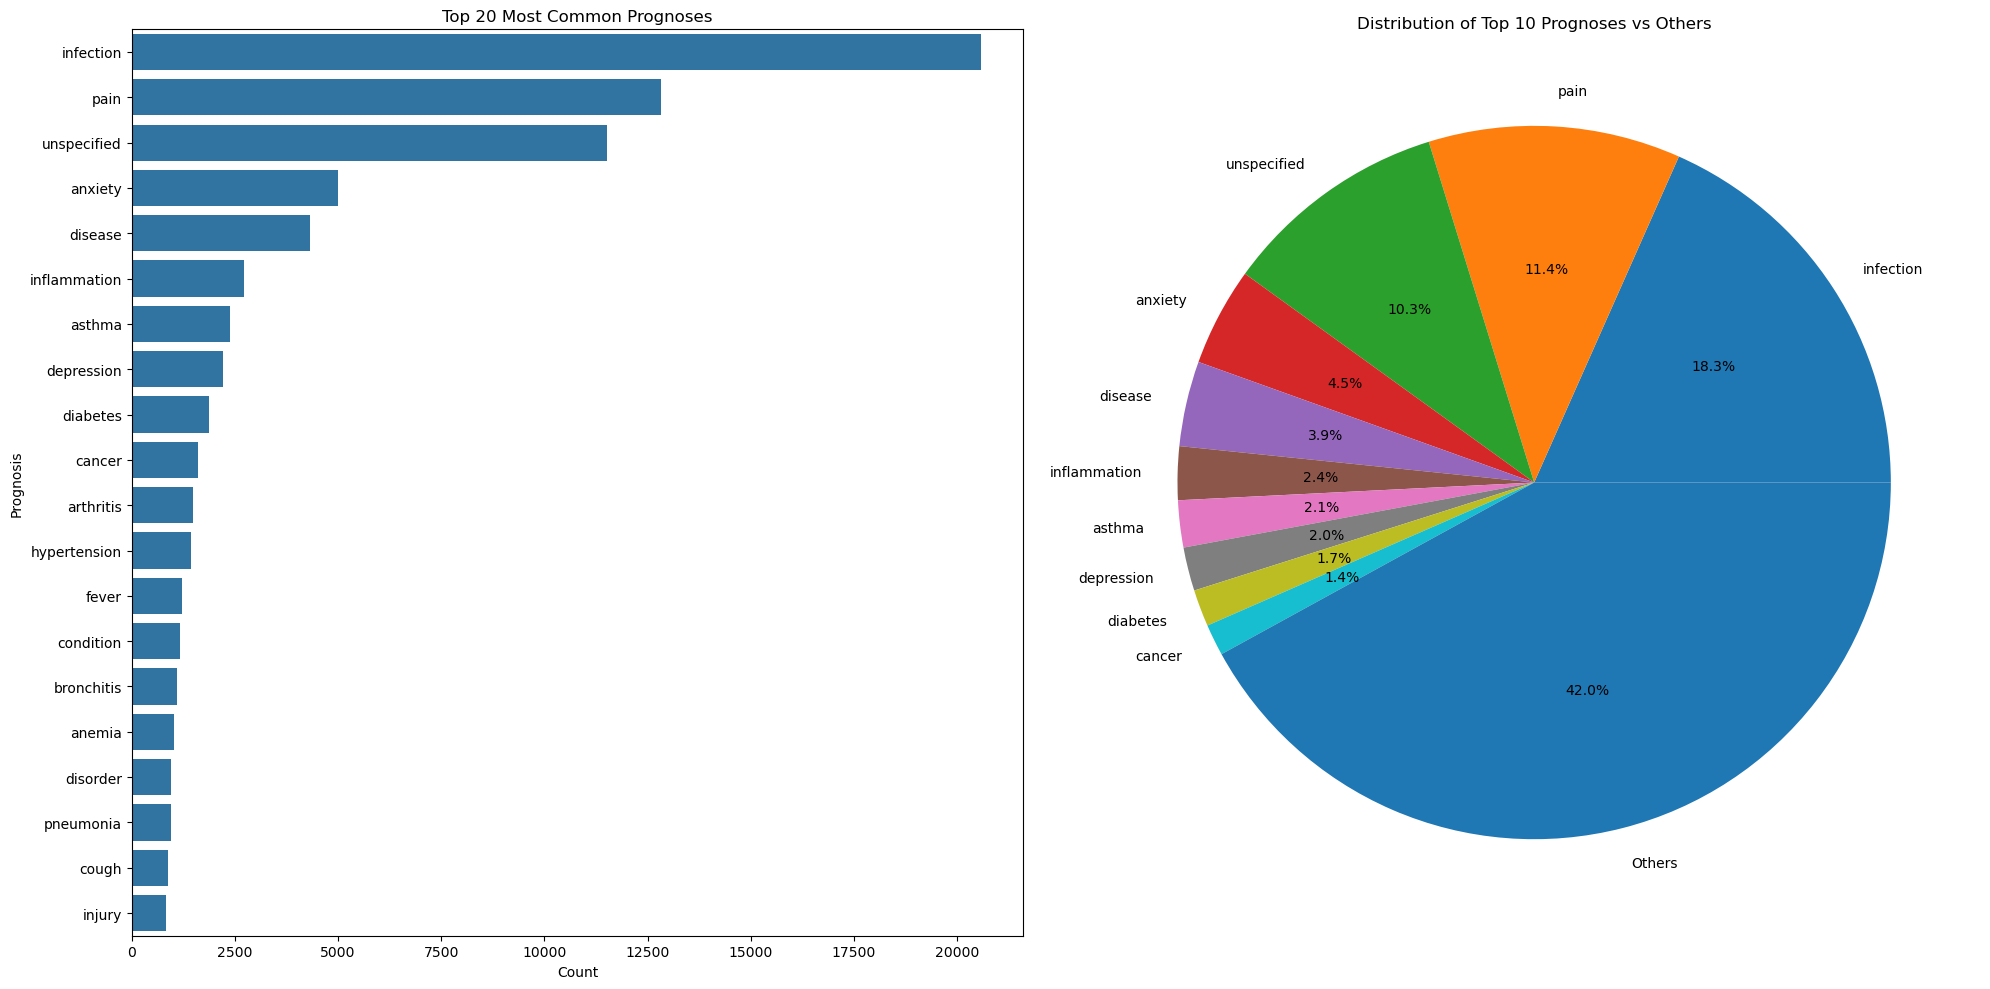


Prognosis Statistics:
--------------------------------------------------
Total cases: 112150
Unknown cases: 0 (0.00%)
Unique prognoses: 23964

Top 20 Prognoses:
--------------------------------------------------
infection                      20578 ( 18.35%)
pain                           12815 ( 11.43%)
unspecified                    11523 ( 10.27%)
anxiety                         5005 (  4.46%)
disease                         4327 (  3.86%)
inflammation                    2717 (  2.42%)
asthma                          2386 (  2.13%)
depression                      2216 (  1.98%)
diabetes                        1872 (  1.67%)
cancer                          1598 (  1.42%)
arthritis                       1479 (  1.32%)
hypertension                    1433 (  1.28%)
fever                           1218 (  1.09%)
condition                       1183 (  1.05%)
bronchitis                      1088 (  0.97%)
anemia                          1019 (  0.91%)
disorder                         95

In [43]:
def get_most_common_word(row):
    """Extract most common word from multiple condition columns including input/output text"""
    # Collect all words from relevant columns
    all_words = []
    
    # Handle list columns
    if isinstance(row['output_conditions'], list):
        all_words.extend([word.strip() for word in row['output_conditions']])
    if isinstance(row['all_conditions'], list):
        all_words.extend([word.strip() for word in row['all_conditions']])
    
    # Handle string columns
    if isinstance(row['prognosis'], str):
        all_words.extend([word.strip() for word in row['prognosis'].split(',')])
    if isinstance(row['enhanced_prognosis'], str):
        all_words.extend([word.strip() for word in row['enhanced_prognosis'].split(',')])
    if isinstance(row['extracted_conditions'], list):
        all_words.extend([word.strip() for word in row['extracted_conditions']])
    
    # Add words from input and output text
    if isinstance(row['input'], str):
        # Extract medical conditions from input text
        input_conditions = enhanced_medical_condition_extraction(row['input'])
        all_words.extend(input_conditions)
    
    if isinstance(row['output'], str):
        # Extract medical conditions from output text
        output_conditions = enhanced_medical_condition_extraction(row['output'])
        all_words.extend(output_conditions)
    
    # Remove empty strings and standardize
    all_words = [word.lower() for word in all_words if word and word.strip()]
    
    # If no words found, return 'unknown'
    if not all_words:
        return 'unknown'
    
    # Count word frequencies
    word_counts = Counter(all_words)
    
    # Get most common word
    if word_counts:
        return word_counts.most_common(1)[0][0]
    return 'unknown'

# Apply the function to create final_prognosis column
new_df['final_prognosis'] = new_df.apply(get_most_common_word, axis=1)

# Create visualizations
plt.figure(figsize=(20, 10))

# Plot 1: Top 20 Prognoses Distribution
plt.subplot(1, 2, 1)
prognosis_counts = new_df['final_prognosis'].value_counts()
top_20_prognoses = prognosis_counts.head(20)
sns.barplot(x=top_20_prognoses.values, y=top_20_prognoses.index)
plt.title('Top 20 Most Common Prognoses')
plt.xlabel('Count')
plt.ylabel('Prognosis')

# Plot 2: Pie Chart of Top 10 Prognoses vs Others
plt.subplot(1, 2, 2)
top_10_prognoses = prognosis_counts.head(10)
others_count = prognosis_counts[10:].sum()
pie_data = pd.concat([top_10_prognoses, pd.Series({'Others': others_count})])
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Distribution of Top 10 Prognoses vs Others')

plt.tight_layout()
plt.show()

# Print statistics
print("\nPrognosis Statistics:")
print("-" * 50)
total_cases = len(new_df)
unknown_cases = len(new_df[new_df['final_prognosis'] == 'unknown'])
print(f"Total cases: {total_cases}")
print(f"Unknown cases: {unknown_cases} ({unknown_cases/total_cases*100:.2f}%)")
print(f"Unique prognoses: {len(prognosis_counts)}")

print("\nTop 20 Prognoses:")
print("-" * 50)
for prognosis, count in top_20_prognoses.items():
    percentage = (count/total_cases) * 100
    print(f"{prognosis:<30} {count:>5} ({percentage:>6.2f}%)")

In [52]:
# Create a new DataFrame with just the relevant columns
summary_df = new_df[[
    'input', 
    'output', 
    'output_conditions', 
    'all_conditions', 
    'prognosis', 
    'extracted_conditions', 
    'enhanced_prognosis', 
    'final_prognosis'
]].copy()

# Display settings for better visibility
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)  # This will show full content of each cell
pd.set_option('display.expand_frame_repr', False)  # Don't wrap long strings

# Display the DataFrame
print("\nSummary DataFrame:")
# print(summary_df.head(20))

summary_df.head()


Summary DataFrame:


,input,output,output_conditions,all_conditions,prognosis,extracted_conditions,enhanced_prognosis,final_prognosis
0,"i woke up this morning feeling the whole room is spinning when i was sitting down. i went to the bathroom walking unsteadily, as i tried to focus i feel nauseous. i try to vomit but it wont come out.. after taking panadol and sleep for few hours, i still feel the same.. by the way, if i lay down or sit down, my head do not spin, only when i want to move around then i feel the whole world is spinning.. and it is normal stomach discomfort at the same time? earlier after i relieved myself, the spinning lessen so i am not sure whether its connected or coincidences.. thank you doctor!","hi, thank you for posting your query. the most likely cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo. in this condition, the most common symptom is dizziness or giddiness, which is made worse with movements. accompanying nausea and vomiting are common. the condition is due to problem in the ear, and improves in a few days on own. betahistine tablets would help relieve your symptoms. doing vestibular rehabilitation or adaptation exercises would prevent the recurrence of these symptoms. an ent evaluation would also help. i hope it helps. best wishes, chat doctortor.","[vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo]","[vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo]","vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo","[vertigo, nausea, due to problem in the ear, and improves in a few days on own, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo, condition]","vertigo, nausea, due to problem in the ear, and improves in a few days on own, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo, condition",vertigo
1,my baby has been pooing 5-6 times a day for a week. in the last few days it has increased to 7 and they are very watery with green stringy bits in them. he does not seem unwell i.e no temperature and still eating. he now has a very bad nappy rash from the pooing ...help!,hi... thank you for consulting in chat doctortor. it seems your kid is having viral diarrhea. once it starts it will take 5-7 days to completely get better. unless the kids having low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting...you need not worry. there is no need to use antibiotics unless there is blood in the motion. antibiotics might worsen if unnecessarily used causing antibiotic associated diarrhea. i suggest you use zinc supplements (zd chat doctortor.,[],[],"low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting, viral diarrhea, diarrhea","[low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting, viral diarrhea, diarrhea]","low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting, viral diarrhea, diarrhea",low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting
2,"hello, my husband is taking oxycodone due to a broken legsurgery. he has been taking this pain medication for one month. we are trying to conceive our second baby. will this medication afect the fetus? or the health of the baby? or can it bring birth defects? thank you.","hello, and i hope i can help you today.first, there is no medication that can be taken by the father that has any way to get into your system or a baby if you conceive. medications can only affect a fetus if you take it while pregnant. the only issue is that certain medications may decrease a men sperm count and affect fertility, however pain medications like oxycodone do not have this 

In [53]:
# make final_prognosis column the first column
summary_df = summary_df[['final_prognosis', 'input', 'output', 'output_conditions', 'all_conditions', 'prognosis', 'extracted_conditions', 'enhanced_prognosis']]
summary_df.head()


,final_prognosis,input,output,output_conditions,all_conditions,prognosis,extracted_conditions,enhanced_prognosis
0,vertigo,"i woke up this morning feeling the whole room is spinning when i was sitting down. i went to the bathroom walking unsteadily, as i tried to focus i feel nauseous. i try to vomit but it wont come out.. after taking panadol and sleep for few hours, i still feel the same.. by the way, if i lay down or sit down, my head do not spin, only when i want to move around then i feel the whole world is spinning.. and it is normal stomach discomfort at the same time? earlier after i relieved myself, the spinning lessen so i am not sure whether its connected or coincidences.. thank you doctor!","hi, thank you for posting your query. the most likely cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo. in this condition, the most common symptom is dizziness or giddiness, which is made worse with movements. accompanying nausea and vomiting are common. the condition is due to problem in the ear, and improves in a few days on own. betahistine tablets would help relieve your symptoms. doing vestibular rehabilitation or adaptation exercises would prevent the recurrence of these symptoms. an ent evaluation would also help. i hope it helps. best wishes, chat doctortor.","[vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo]","[vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo]","vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo","[vertigo, nausea, due to problem in the ear, and improves in a few days on own, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo, condition]","vertigo, nausea, due to problem in the ear, and improves in a few days on own, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo, condition"
1,low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting,my baby has been pooing 5-6 times a day for a week. in the last few days it has increased to 7 and they are very watery with green stringy bits in them. he does not seem unwell i.e no temperature and still eating. he now has a very bad nappy rash from the pooing ...help!,hi... thank you for consulting in chat doctortor. it seems your kid is having viral diarrhea. once it starts it will take 5-7 days to completely get better. unless the kids having low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting...you need not worry. there is no need to use antibiotics unless there is blood in the motion. antibiotics might worsen if unnecessarily used causing antibiotic associated diarrhea. i suggest you use zinc supplements (zd chat doctortor.,[],[],"low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting, viral diarrhea, diarrhea","[low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting, viral diarrhea, diarrhea]","low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting, viral diarrhea, diarrhea"
2,pain,"hello, my husband is taking oxycodone due to a broken legsurgery. he has been taking this pain medication for one month. we are trying to conceive our second baby. will this medication afect the fetus? or the health of the baby? or can it bring birth defects? thank you.","hello, and i hope i can help you today.first, there is no medication that can be taken by the father that has any way to get into your system or a baby if you conceive. medications can only affect a fetus if you take it while pregnant. the only issue is that certain medications may decrease a men sperm count and affect fertility, however pain medications like oxycodone do not have 

In [55]:
# sort final_prognosis column alphabetically 
summary_df['final_prognosis'] = summary_df['final_prognosis'].str.split(',').apply(sorted)
summary_df.head()

# sort final_prognosis column alphabetically 
summary_df['final_prognosis'] = summary_df['final_prognosis'].str.split(',').apply(sorted)
summary_df.head()
    

TypeError: 'float' object is not iterable

In [56]:
summary_df.head()

,final_prognosis,input,output,output_conditions,all_conditions,prognosis,extracted_conditions,enhanced_prognosis
0,[vertigo],"i woke up this morning feeling the whole room is spinning when i was sitting down. i went to the bathroom walking unsteadily, as i tried to focus i feel nauseous. i try to vomit but it wont come out.. after taking panadol and sleep for few hours, i still feel the same.. by the way, if i lay down or sit down, my head do not spin, only when i want to move around then i feel the whole world is spinning.. and it is normal stomach discomfort at the same time? earlier after i relieved myself, the spinning lessen so i am not sure whether its connected or coincidences.. thank you doctor!","hi, thank you for posting your query. the most likely cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo. in this condition, the most common symptom is dizziness or giddiness, which is made worse with movements. accompanying nausea and vomiting are common. the condition is due to problem in the ear, and improves in a few days on own. betahistine tablets would help relieve your symptoms. doing vestibular rehabilitation or adaptation exercises would prevent the recurrence of these symptoms. an ent evaluation would also help. i hope it helps. best wishes, chat doctortor.","[vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo]","[vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo]","vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo","[vertigo, nausea, due to problem in the ear, and improves in a few days on own, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo, condition]","vertigo, nausea, due to problem in the ear, and improves in a few days on own, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo, condition"
1,[low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting],my baby has been pooing 5-6 times a day for a week. in the last few days it has increased to 7 and they are very watery with green stringy bits in them. he does not seem unwell i.e no temperature and still eating. he now has a very bad nappy rash from the pooing ...help!,hi... thank you for consulting in chat doctortor. it seems your kid is having viral diarrhea. once it starts it will take 5-7 days to completely get better. unless the kids having low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting...you need not worry. there is no need to use antibiotics unless there is blood in the motion. antibiotics might worsen if unnecessarily used causing antibiotic associated diarrhea. i suggest you use zinc supplements (zd chat doctortor.,[],[],"low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting, viral diarrhea, diarrhea","[low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting, viral diarrhea, diarrhea]","low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting, viral diarrhea, diarrhea"
2,[pain],"hello, my husband is taking oxycodone due to a broken legsurgery. he has been taking this pain medication for one month. we are trying to conceive our second baby. will this medication afect the fetus? or the health of the baby? or can it bring birth defects? thank you.","hello, and i hope i can help you today.first, there is no medication that can be taken by the father that has any way to get into your system or a baby if you conceive. medications can only affect a fetus if you take it while pregnant. the only issue is that certain medications may decrease a men sperm count and affect fertility, however pain medications like oxycodone do not

In [59]:
print("Current data type:", summary_df['final_prognosis'].dtype)

# Remove brackets and convert to string
summary_df['final_prognosis'] = summary_df['final_prognosis'].apply(lambda x: str(x).strip('[]'))

summary_df['final_prognosis'] = summary_df['final_prognosis'].str.replace("'", "")



Current data type: object


In [60]:
summary_df.head()

,final_prognosis,input,output,output_conditions,all_conditions,prognosis,extracted_conditions,enhanced_prognosis
0,vertigo,"i woke up this morning feeling the whole room is spinning when i was sitting down. i went to the bathroom walking unsteadily, as i tried to focus i feel nauseous. i try to vomit but it wont come out.. after taking panadol and sleep for few hours, i still feel the same.. by the way, if i lay down or sit down, my head do not spin, only when i want to move around then i feel the whole world is spinning.. and it is normal stomach discomfort at the same time? earlier after i relieved myself, the spinning lessen so i am not sure whether its connected or coincidences.. thank you doctor!","hi, thank you for posting your query. the most likely cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo. in this condition, the most common symptom is dizziness or giddiness, which is made worse with movements. accompanying nausea and vomiting are common. the condition is due to problem in the ear, and improves in a few days on own. betahistine tablets would help relieve your symptoms. doing vestibular rehabilitation or adaptation exercises would prevent the recurrence of these symptoms. an ent evaluation would also help. i hope it helps. best wishes, chat doctortor.","[vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo]","[vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo]","vertigo, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo","[vertigo, nausea, due to problem in the ear, and improves in a few days on own, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo, condition]","vertigo, nausea, due to problem in the ear, and improves in a few days on own, cause for your symptoms is benign paroxysmal positional vertigo (bppv), a type of peripheral vertigo, condition"
1,low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting,my baby has been pooing 5-6 times a day for a week. in the last few days it has increased to 7 and they are very watery with green stringy bits in them. he does not seem unwell i.e no temperature and still eating. he now has a very bad nappy rash from the pooing ...help!,hi... thank you for consulting in chat doctortor. it seems your kid is having viral diarrhea. once it starts it will take 5-7 days to completely get better. unless the kids having low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting...you need not worry. there is no need to use antibiotics unless there is blood in the motion. antibiotics might worsen if unnecessarily used causing antibiotic associated diarrhea. i suggest you use zinc supplements (zd chat doctortor.,[],[],"low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting, viral diarrhea, diarrhea","[low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting, viral diarrhea, diarrhea]","low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting, viral diarrhea, diarrhea"
2,pain,"hello, my husband is taking oxycodone due to a broken legsurgery. he has been taking this pain medication for one month. we are trying to conceive our second baby. will this medication afect the fetus? or the health of the baby? or can it bring birth defects? thank you.","hello, and i hope i can help you today.first, there is no medication that can be taken by the father that has any way to get into your system or a baby if you conceive. medications can only affect a fetus if you take it while pregnant. the only issue is that certain medications may decrease a men sperm count and affect fertility, however pain medications like oxycodone do not have 

In [63]:
# Save summary_df to CSV
summary_df.to_csv('Pivot_Resource/medical_prognosis_summary.csv', index=False)
print("Summary DataFrame has been saved to 'medical_prognosis_summary.csv'")

Summary DataFrame has been saved to 'medical_prognosis_summary.csv'


In [79]:
# read the csv file
summary_df = pd.read_csv('Pivot_Resource/medical_prognosis_summary.csv')
summary_df.head(10)


,final_prognosis,input,output,output_conditions,all_conditions,prognosis,extracted_conditions,enhanced_prognosis
0,"['', ' ', ' ', ' could you please help me on how to recover from this alergy', ' dermatographic urticaria ']","hi i m suffering from dermatographic urticaria ,,,, could you please help me on how to recover from this alergy","welcome to chat doctortor there is increased skin sensitivity to pressure which causes the typical lesions. you will need to understand that this is aggravated by stress and pressure on skin. avoid stress, do relaxation exercises, avoid wearing tight watch, clothing. avoid sun exposure. take cooler showers. eat plenty of fresh fruits and green leafy vegetables. chat doctortor. exercise daily. you can use cetirizine or other over the counter antihistamines for relief and prevention of attacks. it may be combined with sanitizing which works better in treatment.",[],"['dermatographic urticaria ,,,, could you please help me on how to recover from this alergy']","dermatographic urticaria ,,,, could you please help me on how to recover from this alergy","['dermatographic urticaria ,,,, could you please help me on how to recover from this alergy welcome to chat doctortor there is increased skin sensitivity to pressure which causes the typical lesions']","dermatographic urticaria ,,,, could you please help me on how to recover from this alergy welcome to chat doctortor there is increased skin sensitivity to pressure which causes the typical lesions"
1,"['', ' ', ' i am needles to say concerned i m a 58 year old hispanic male', ' a small skin flap on my penis shaft', ' and have worked out most of my life ', ' i am 5 9 and 170 lbs', ' i am a little embaressed to ask my female doctortor whom i have been seeing for type 2 diabeties']","i just noticed what appears to be a small skin flap on my penis shaft, i am needles to say concerned i m a 58 year old hispanic male,i am a little embaressed to ask my female doctortor whom i have been seeing for type 2 diabeties,,i am 5 9 and 170 lbs,and have worked out most of my life ,","hello and. as a urologist, i can fully understand your concern. a small flap over shaft penis, at 58 years age, shouldnt cause any worry. if youre able to have sex or masturbate normally, it shouldnt be bothersome. if it was in an exposed area, then theres a cosmetic problem. flaps over shaft penis, can be easily corrected with minor surgery. this need be done in your case, only if youre worried about the cosmetic purpose. its usually done, under local anesthesia, as a day case. you can contact me for any doubt, sending it as a direct question. chat doctortor. manga.",[],"['a small skin flap on my penis shaft, i am needles to say concerned i m a 58 year old hispanic male,i am a little embaressed to ask my female doctortor whom i have been seeing for type 2 diabeties,,i am 5 9 and 170 lbs,and have worked out most of my life ,']","a small skin flap on my penis shaft, i am needles to say concerned i m a 58 year old hispanic male,i am a little embaressed to ask my female doctortor whom i have been seeing for type 2 diabeties,,i am 5 9 and 170 lbs,and have worked out most of my life ,","['a small skin flap on my penis shaft, i am needles to say concerned i m a 58 year old hispanic male,i am a little embaressed to ask my female doctortor whom i have been seeing for type 2 diabeties,,i am 5 9 and 170 lbs,and have worked out most of my life , hello and']","a small skin flap on my penis shaft, i am needles to say concerned i m a 58 year old hispanic male,i am a little embaressed to ask my female doctortor whom i have been seeing for type 2 diabeties,,i am 5 9 and 170 lbs,and have worked out most of my life , hello and"
2,"['', ' ', ' my hairs falls more and more ! can you tell me why ?? i m in deep trouble ', ' give me suggestions please i am 20 years old', ' typhoid but at that time my hairs were ok ! after 1 month of getting rid of typhoid ']","why am i getting excess hair loss after recovery 

In [91]:
# read the csv file
new_medical_prognosis_df = pd.read_csv('Pivot_Resource/new_medical_prognosis_df.csv')
new_medical_prognosis_df.head()

# rename combined_prognosis column to prognosis
new_medical_prognosis_df.rename(columns={'combined_prognosis': 'prognosis'}, inplace=True)
new_medical_prognosis_df.head()

# # make prognosis column the first column
new_medical_prognosis_df = new_medical_prognosis_df[['prognosis', 'input', 'output', 'final_prognosis']]
new_medical_prognosis_df.head()

# sort data frame by prognosis column alphabetically 
new_medical_prognosis_df = new_medical_prognosis_df.sort_values(by='prognosis')
new_medical_prognosis_df.head() 

# save the data frame to a csv file
new_medical_prognosis_df.to_csv('Pivot_Resource/new_medical_prognosis_df.csv', index=False) 


















In [93]:
# First verify we have the correct DataFrame
print("Dataset shape:", new_medical_prognosis_df.shape)
print("\nColumns:", new_medical_prognosis_df.columns.tolist())

# Define medical terms to look for
medical_terms = {
    'conditions': [
        'illness', 'tumor', 'cancer', 'palsy', 'anemia',
        'infection', 'disease', 'syndrome', 'disorder',
        'inflammation', 'arthritis', 'diabetes', 'hypertension',
        'fever', 'pain', 'allergy', 'asthma', 'migraine',
        'stroke', 'sepsis', 'infection', 'autoimmune', 'eczema', 
        'hepatitis', 'pneumonia', 'rheumatism', 'cholesterol',
        'cardiovascular disease', 'multiple sclerosis', 'Parkinson’s disease', 
        'fibromyalgia', 'celiac disease', 'dementia'
    ],
    'anatomy': [
        'bladder', 'liver', 'heart', 'kidney', 'brain',
        'lung', 'spine', 'bone', 'muscle', 'nerve',
        'stomach', 'intestine', 'throat', 'uterus',
        'skin', 'blood', 'joint', 'eye', 'ear', 'nose',
        'pancreas', 'gallbladder', 'prostate', 'thyroid', 
        'adrenal gland', 'colon', 'esophagus', 'rectum', 
        'spleen', 'cervix', 'vagina', 'ovary', 'fallopian tube', 
        'testicle', 'cornea', 'retina', 'larynx'
    ],
    'procedures': [
        'surgery', 'biopsy', 'transplant', 'injection',
        'steroids', 'therapy', 'treatment', 'medication',
        'scan', 'test', 'mri', 'xray', 'ultrasound',
        'vaccination', 'chemotherapy', 'radiation therapy', 'dialysis',
        'laparoscopy', 'endoscopy', 'catheterization', 'colonoscopy',
        'pacemaker insertion', 'laser therapy', 'physiotherapy',
        'blood transfusion', 'splinting', 'stitching', 'amputation', 
        'blood test', 'vaccine', 'EKG', 'EEG', 'heart bypass surgery'
    ],
    'reproductive': [
        'sperm', 'pregnancy', 'semen', 'fertility',
        'ovulation', 'menstruation', 'conception',
        'pregnant', 'birth', 'ivf', 'uterus', 'miscarriage',
        'embryo', 'placenta', 'gestation', 'contraception',
        'egg', 'fallopian tube', 'cervix', 'fertilization', 
        'preeclampsia', 'lactation', 'postpartum', 'delivery',
        'breastfeeding', 'menopause', 'hysterectomy', 'prostate'
    ]
}


def extract_medical_terms(text):
    """Extract medical terms from text"""
    if not isinstance(text, str):
        return []
    
    text = text.lower()
    found_terms = []
    
    # Search for terms in each category
    for category, terms in medical_terms.items():
        for term in terms:
            if term in text:
                found_terms.append(term)
    
    return list(set(found_terms))

def get_most_common_prognosis(row):
    """Extract most common medical terms from all columns"""
    all_terms = []
    
    # Extract terms from each column
    for column in ['prognosis', 'input', 'output']:
        if pd.notna(row[column]):
            terms = extract_medical_terms(str(row[column]))
            all_terms.extend(terms)
    
    # Return all unique terms found
    return ', '.join(set(all_terms)) if all_terms else 'unspecified'

# Apply the extraction to create new_prognoses column
new_medical_prognosis_df['new_prognoses'] = new_medical_prognosis_df.apply(get_most_common_prognosis, axis=1)

# Display settings for better visibility
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Display sample results
print("\nSample of New Prognoses:")
print("-" * 50)
print(new_medical_prognosis_df[['input', 'output', 'prognosis', 'new_prognoses']].head(20))

# Show statistics
total_rows = len(new_medical_prognosis_df)
specified_rows = len(new_medical_prognosis_df[new_medical_prognosis_df['new_prognoses'] != 'unspecified'])
print(f"\nTotal rows: {total_rows}")
print(f"Rows with extracted prognosis: {specified_rows}")
print(f"Percentage with prognosis: {(specified_rows/total_rows)*100:.2f}%")

# display the data frame
new_medical_prognosis_df.head(20)

# Optional: Save the updated DataFrame
# new_medical_prognosis_df.to_csv('Pivot_Resource/updated_medical_prognoses.csv', index=False)

Dataset shape: (112150, 5)

Columns: ['prognosis', 'input', 'output', 'final_prognosis', 'new_prognoses']

Sample of New Prognoses:
--------------------------------------------------
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

,prognosis,input,output,final_prognosis,new_prognoses
99269,!!! thanks for any help you can give us,"my daughter was diagnose with lithium toxicity----silent and told she will have dementia. she is 41 years of age and in the middle of a terrible divorce and has two children ages 12 and 7. her long term memory is ok, however, her short term seems affected right now. they claim this will only get worse. please we need some assistance on this terrible diagnosis!!! thanks for any help you can give us.","hello, i understand your concern and would recommend stopping lithium at first. a balanced diet can help slow the progression of the disorder. i would also recommend taking supplements containing ginkgo balboa, ginseng, l-carnitine and omega 3 fatty acids. if her memory problems deteriorate, i would recommend consulting with a neurologist. hope i have answered your query. let me know if i can assist you further.",!!! thanks for any help you can give us,"disorder, dementia, ear, nose"
59425,(1) you may be allergic to some garden related - pollen flower or any other allergen which can cause such off and on symptoms,"hi, i have been sick for about 4 years now. have had this intermittent illness, with severe body aches deep inner pain like someone beat me inside with a baseball bat at times, with even this chronic sore throat on one side of my throat....and feels like i have a low grade fever with it too. it is aweful! been going on intermittently for years now, and when i take american ginseng it goes away? when i stop taking it it returns and feels even worse. i have thyroid but have my blood tested every 6 months, just did a few days again again and my doctortor says my thyroid levels are normal and i am not anemic. my dad had pernicious anemia so i told my doctor and he said the blood work he did on my blood had no warning signs for that either. i used to work in maine as a gardener for over 10 years and worry maybe lyme disease or some other more serious auto immune disease? i also had a bad hiatal hernia but this started to happen to me way before the hernia got worse or i had symptoms with the hernia, so i don t think it is the hernia. i worry it is something far more serious and i can not get into see a new doctortor for 2 months as i live in a rural area and it is not good. i went for a 6 month stretch where i felt better, no symptoms at all, but i also left the town i live in and went to florida for a while and i notice that when i get out of the town i live in, i feel better too?? not sure if the air is bad here or the water?? i am at my wits end and have no clue what i may have or how serious?? please help!","your history suggests (1) you may be allergic to some garden related - pollen flower or any other allergen which can cause such off and on symptoms.(2) you need to go for thorough workup like throat culture and sensitivity test, allergy panel test, other test which may be required after your physical exam.(3) best option is when you get complaints next time, you go to a good medical facility and consult internal medicine physician about your off and on complaints. internal physician would do physical examination and suggest further course most likely as i mentioned by me in 1 2",(1) you may be allergic to some garden related - pollen flower or any other allergen which can cause such off and on symptoms,"disease, allergy, anemia, thyroid, fever, blood, throat, blood test, ear, illness, test, pain"
68538,(2) malignant tumors on the bladder which has caused some type of urine to seep out of my rectum,"what type of collecting bag on the outside of my body would i been given? how does this all work? i am a stage 4 colon cancer patient who has been diagnosed with (2) malignant tumors on the bladder which has caused some type of urine to seep out of my rectum. this is a constant event that happens 247. would this surgery enable me to pass urine through the device explained. i am wondering about the risks involved. i am a 75 y

In [97]:
# Apply the extraction and create new DataFrame with the new column
new_medical_prognosis_df['new_prognoses'] = new_medical_prognosis_df.apply(get_most_common_prognosis, axis=1)

# Display settings for better visibility
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Create a new display DataFrame with all relevant columns
display_df = new_medical_prognosis_df[['input', 'output', 'prognosis', 'new_prognoses']]

# make prognosis column the first column
display_df = display_df[['new_prognoses','prognosis', 'input', 'output', ]]
display_df.head()

# sort the data frame by prognosis column alphabetically 
display_df = display_df.sort_values(by='new_prognoses')
display_df.head()

# Reset index for clean display
display_df = display_df.reset_index(drop=True)

# Display the DataFrame
print("\nUpdated DataFrame with New Prognoses:")
print("-" * 50)

#reset index
display_df = display_df.reset_index(drop=True)

display_df.head(20)

# Optional: Save the updated DataFrame
# display_df.to_csv('Pivot_Resource/medical_prognosis_with_new_terms.csv', index=False)


Updated DataFrame with New Prognoses:
--------------------------------------------------


,new_prognoses,prognosis,input,output
0,allergy,allergy,"hi, for the past few months. there are some pimple-like allergies growing in my face. i couldn t tell if it s just a pimple or an allergy but a lot of people have been telling me that those are allergies. these roundish things have been spreading all over my face already. please help me. it s not making me feel good about myself already. thank you!",look like pimples as they are on face these are in oily swindon use oily and greedy food avoid oils like mustard coconut walnut groundnut almonds and soda use olive for application on face and for cooking use nontoxic soaps creams and shampoo apply clindamycin gel calamine once a day and retinoid acid at night before sleep switch of light after applying retinoid acid gel as it reacts with light take fexofenadine 120 mg sos if itching continue for 3 months you will be fine
1,allergy,allergy,"i had some brown spots on my right cheek,so i consulted my doctortor and he advised me hydroquinone and tretinoin gel...but after using them for just 2 days i got redness,itchyness and burning sensation all over my cheek..could you please suggest me what to do..how can i reduce this side effects with home remedies...i just dont want to stop using this medicine because i think it will work","you got allergy to that cream containing hq and retinoid. there is known side effect of these creams. you havent mentioned your contact time for the cream, it shout be more than 2 hrs, no application at daytime, strict sun avoidance are the rules with this cream. you stop them for now, just try to avoid soap and other cosmetics for five to seven days, apply cultivate cream twice daily over rash. once rash subsides u can try that cream again with guidelines i have mentioned above, still raschatdoctortores better to stop it and go for chemical peel."
2,allergy,allergy,"i am a 50 yo male. i have had apthous ulcers as long as i can remember. there had been a long span of time in which i had not had a breakout, but in the last few weeks, i have been suffering a major upheaval. the inner part of my lips feel rough to my tongue and the ulcers are very small and on the margin of the lip and mucous membrane . however, i have others on the side of my tongue and a very larger one on the floor of my mouth. can this be some sort of allergy? many thanks..","hellothere can be various reasons for this including street, nutritional deficiency etc. etc but since you are saying that they are multiple so i would suggest that you visit your dentist and get an examination done to rule out something serious in the meanwhile you can do following1.lukewarm saline rinses2.apply hegel to the affected area 3-4 times daily3.use mccoppin 10-15 min before eating so that you can eat properly4.start taking activity and zirconia tab daily hope that helps"
3,allergy,allergy,"hi, suddenly since yyesterday evening my kid s uupper lip started swelling and by today morning it is swollen 3-4 times. i don t think if it is any food allergy as she did not have anything unusual. can you please ssuggest some cream or syrup. thanks","since the lip is soft and lose tissue, little swelling also gets bigger soon. it could be little unknown trauma or insect sting or general allergy (lesser chances otherwise it would affect lower lip too). no cream is advised. if cetirizine and anti-inflammatory syrup for kids is given, it would suffice. if you have to give for long period, then ask pediatrician first.however, natural cure turmeric powder in milk and water also effects without side effects. i dont know age of kid whether he can take it. otherwise, ayurveda medicine panjiva vat is also good for allergy along with turmeric. hope it will be helpful."
4,allergy,allergy,"i have an allergy to sulfa drugs and have found out (after having a rash for 5 months) that im also allergic to my lasix. my doctortor tells me that there are no truly sulfa-free diuretics, but i simply cannot believe (accept) that. please t

In [98]:
# Save the updated DataFrame
display_df.to_csv('Pivot_Resource/newest_medical_prognosis_df.csv', index=False)

In [5]:
# read the csv file
display_df = pd.read_csv('Pivot_Resource/newest_medical_prognosis_df.csv')
display_df.head(20)
    

,new_prognoses,prognosis,input,output
0,allergy,allergy,"hi, for the past few months. there are some pi...",look like pimples as they are on face these ar...
1,allergy,allergy,"i had some brown spots on my right cheek,so i ...",you got allergy to that cream containing hq an...
2,allergy,allergy,i am a 50 yo male. i have had apthous ulcers a...,hellothere can be various reasons for this inc...
3,allergy,allergy,"hi, suddenly since yyesterday evening my kid s...","since the lip is soft and lose tissue, little ..."
4,allergy,allergy,i have an allergy to sulfa drugs and have foun...,"hello, welcome to chat doctortor. thanks for y..."
5,allergy,allergy,"hi, i have inherited a very allergenic system....","hello, i have gone through your query and unde..."
6,allergy,in day time when exposed to sun light and even...,hi this is aaaaa from bangalore. my friend got...,"hi, thanks for writing here. it seems your fri..."
7,allergy,allergy,i was sprayed in my face by an employee at the...,hi i did review your conditioner reaction of f...
8,allergy,diarrhea last march,our baby is 18 months old. he is suffering fro...,"hi, im chat doctortor. 5 kg weight for 18 mont..."
9,allergy,allergy,my son is allergic to sufa and sulfur drugs an...,"hi there, thanks for your query. the rashes ar..."


In [6]:
# target rows in the new_prognoses column where the number of terms is greater than 1
display_df = display_df[display_df['new_prognoses'].str.split(',').apply(len) > 1]
display_df.head() 
    

,new_prognoses,prognosis,input,output
38,"allergy, anemia, biopsy, infection, ear, pain",infection,sir i have a white little raised line on lower...,"hello, i can understand your concern. as you a..."
39,"allergy, anemia, blood test, blood, eye, ear, ...",vertigo,got up quickly this morning at 5 am to use bat...,welcome to chat doctortor. this occurs due to ...
40,"allergy, anemia, eye, ear, treatment",anxiety,i have been allergic to atmoshpheric changes a...,hi welcome to chat doctortor forum. thanks for...
41,"allergy, anemia, fever, blood, throat, hepatit...",infection,i am absolutely fed up with my reoccurring fev...,"hello you are having fever, chills weakness an..."
42,"allergy, anemia, infection, ear, test, pain",infection,"hi, i have patches of red on the sides of my t...","hi dear, welcome to chat doctortor. understand..."


In [7]:
# show the number of rows in the new_prognoses column where the number of terms is greater than 1
print(len(display_df[display_df['new_prognoses'].str.split(',').apply(len) > 1]))  

106478


In [17]:
# Define the sample size and starting index
sample_size = 100
start_index = 0

def extract_all_entities(row):
    """Extract medical entities from all relevant text columns in the row"""
    if not isinstance(row, pd.Series):
        return []
    
    # Combine text from all relevant columns
    all_text = ' '.join([
        str(row['input']),
        str(row['output']),
        str(row['prognosis']),
        str(row['new_prognoses'])
    ])
    
    try:
        # Split text into smaller chunks (300 tokens each to be safe)
        words = all_text.split()
        chunks = []
        chunk_size = 300  # Reduced chunk size
        
        for i in range(0, len(words), chunk_size):
            chunk = ' '.join(words[i:i + chunk_size])
            # Ensure chunk isn't too long by truncating if necessary
            if len(chunk.split()) > 300:
                chunk = ' '.join(chunk.split()[:300])
            chunks.append(chunk)
        
        # Process each chunk and collect all entities
        all_entities = []
        for chunk in chunks:
            try:
                # Use the new_prognoses column as it already contains identified medical terms
                medical_terms = [term.strip() for term in row['new_prognoses'].split(',')]
                all_entities.extend(medical_terms)
            except Exception as chunk_error:
                print(f"Error processing chunk: {chunk_error}")
                continue
        
        # Remove duplicates and join results
        unique_entities = list(set(all_entities))
        if unique_entities:
            print(f"Final entities for row: {unique_entities}")
        return ', '.join(unique_entities) if unique_entities else 'unspecified'
        
    except Exception as e:
        print(f"Error processing text: {e}")
        return 'unspecified'

# Get the next batch of 100 rows
sample_df = display_df.iloc[start_index:start_index + sample_size].copy()

# Process this sample
sample_df['biobert_entities'] = sample_df.apply(extract_all_entities, axis=1)

# Display settings for better visibility
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Display results
print(f"\nProcessing rows {start_index} to {start_index + sample_size}:")
print(sample_df[['new_prognoses', 'biobert_entities']].head(20))

# Show statistics
total_rows = len(sample_df)
specified_rows = len(sample_df[sample_df['biobert_entities'] != 'unspecified'])
print(f"\nBatch Statistics:")
print(f"Total rows in batch: {total_rows}")
print(f"Rows with entities: {specified_rows}")
print(f"Percentage with entities: {(specified_rows/total_rows)*100:.2f}%")

Final entities for row: ['ear', 'anemia', 'biopsy', 'pain', 'infection', 'allergy']
Final entities for row: ['ear', 'eye', 'test', 'anemia', 'blood test', 'allergy', 'blood']
Final entities for row: ['ear', 'eye', 'anemia', 'allergy', 'treatment']
Final entities for row: ['ear', 'test', 'anemia', 'throat', 'fever', 'infection', 'hepatitis', 'allergy', 'blood']
Final entities for row: ['ear', 'test', 'anemia', 'pain', 'infection', 'allergy']
Final entities for row: ['ear', 'anemia', 'infection', 'allergy', 'treatment']
Final entities for row: ['ear', 'anemia', 'infection', 'allergy', 'treatment']
Final entities for row: ['ear', 'nose', 'test', 'anemia', 'blood test', 'allergy', 'blood']
Final entities for row: ['ear', 'nose', 'anemia', 'pain', 'allergy']
Final entities for row: ['ear', 'asthma', 'nose', 'anemia', 'allergy', 'treatment']
Final entities for row: ['ear', 'nose', 'eye', 'treatment', 'anemia', 'test', 'blood test', 'fever', 'allergy', 'blood']
Final entities for row: ['ear',

In [19]:
#batch 1 processing
# Define batch size and starting index
batch_size = 100
start_index = 0

def process_batch(df, start_idx, batch_size):
    """Process a batch of rows to extract primary prognosis"""
    # Get the batch
    end_idx = start_idx + batch_size
    batch_df = df.iloc[start_idx:end_idx].copy()
    
    def extract_primary_prognosis(row):
        """Extract the primary medical condition using BioBERT across all text columns"""
        if not isinstance(row, pd.Series):
            return 'unspecified'
        
        try:
            # Combine text from all relevant columns
            all_text = ' '.join([
                str(row['input']),
                str(row['output']),
                str(row['prognosis']),
                str(row['new_prognoses'])
            ])
            
            # Split into manageable chunks
            words = all_text.split()
            chunks = []
            chunk_size = 300
            
            for i in range(0, len(words), chunk_size):
                chunk = ' '.join(words[i:i + chunk_size])
                if len(chunk.split()) > 300:
                    chunk = ' '.join(chunk.split()[:300])
                chunks.append(chunk)
            
            # Process each chunk and collect disease entities with confidence scores
            conditions = {}
            for chunk in chunks:
                try:
                    # Use BioBERT to identify medical conditions
                    ner_results = nlp_ner(chunk)
                    for entity in ner_results:
                        if entity['entity'] == 'B-DISEASE':
                            condition = entity['word'].lower()
                            # Accumulate confidence scores for repeated mentions
                            conditions[condition] = conditions.get(condition, 0) + entity['score']
                except Exception as chunk_error:
                    print(f"Error processing chunk: {chunk_error}")
                    continue
            
            # If no conditions found, check existing prognosis
            if not conditions and pd.notna(row['prognosis']):
                return row['prognosis']
            
            # Return the condition with highest confidence score
            if conditions:
                primary_condition = max(conditions.items(), key=lambda x: x[1])[0]
                print(f"Found primary condition: {primary_condition} with confidence: {conditions[primary_condition]}")
                return primary_condition
            
            return 'unspecified'
            
        except Exception as e:
            print(f"Error processing text: {e}")
            return 'unspecified'

    # Process the batch
    print(f"\nProcessing batch from index {start_idx} to {end_idx}...")
    batch_df['primary_prognosis'] = batch_df.apply(extract_primary_prognosis, axis=1)
    
    # Show batch statistics
    batch_total = len(batch_df)
    batch_specified = len(batch_df[batch_df['primary_prognosis'] != 'unspecified'])
    print(f"\nBatch Statistics:")
    print(f"Rows processed: {batch_total}")
    print(f"Rows with prognosis: {batch_specified}")
    print(f"Percentage with prognosis: {(batch_specified/batch_total)*100:.2f}%")
    
    # Display sample results from this batch
    print("\nSample Results from Batch:")
    print(batch_df[['input', 'output', 'prognosis', 'new_prognoses', 'primary_prognosis']].head())
    
    return batch_df['primary_prognosis']

# Process first batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")


Processing batch from index 0 to 100...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          input                                                                                                                                                                                 

In [20]:
# View first 20 rows with all columns
print("\nFirst 20 rows with primary prognosis:")
print(display_df[['input', 'output', 'prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

# Or just view the primary_prognosis column with other key columns
print("\nCompact view of first 20 rows:")
print(display_df[['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

# Display settings for better visibility
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Save to CSV if you want to examine in Excel
display_df.to_csv('medical_data_with_primary_prognosis.csv', index=False)


First 20 rows with primary prognosis:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [21]:
# Show only rows with specified prognosis
print("\nRows with identified primary prognosis:")
print(display_df[display_df['primary_prognosis'] != 'unspecified'].head(20))

# Count frequency of different prognoses
print("\nFrequency of primary prognoses:")
print(display_df['primary_prognosis'].value_counts().head(10))


Rows with identified primary prognosis:
                                                                                 new_prognoses                                                                                      prognosis                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [22]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 100 to 200...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          input                                                                                                                                                               

In [23]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 200 to 300...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [24]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 300 to 400...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [25]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 400 to 500...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [26]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 500 to 600...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                input                                                                                                                                                                                                                                                                                                         

In [27]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 600 to 700...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        input                                                                                                                                                                                                                                 

In [28]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 700 to 800...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                           input                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [29]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 800 to 900...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         input                                                                                                                                

In [30]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 900 to 1000...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          input                                                                                                                                                                              

In [31]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 1000 to 1100...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                         input                                                                                                                                                                                                                                                                                                                                                                              

In [32]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 1100 to 1200...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         input                                                                                                                                                                                                                              

In [33]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 1200 to 1300...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [34]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 1300 to 1400...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                            input                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [35]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 1400 to 1500...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [36]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 1500 to 1600...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [37]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 1600 to 1700...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [38]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 1700 to 1800...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                 input                                                                                                                                                                                                                                                                                                                                                                                                      

In [39]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 1800 to 1900...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [40]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 1900 to 2000...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              input                                                                                                                                                                                                                                                                                                         

In [41]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 2000 to 2100...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                input                                                                                                                                                                                                                                                                                                                                                                       

In [42]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 2100 to 2200...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [43]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 2200 to 2300...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       input                                

In [44]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 2300 to 2400...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       input                                                                                                                                                                                                                                                                                                                                                                

In [45]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 2400 to 2500...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              input                                                                                                                                                                                                                                                                                                                                         

In [46]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 2500 to 2600...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  input                                                                                                                                     

In [47]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 2600 to 2700...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 99
Percentage with prognosis: 99.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [48]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 2700 to 2800...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              input                                                                                                                                                                                                                                                                         

In [49]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 2800 to 2900...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           input                                                                                                                                                                                                                                                                                                                                                            

In [50]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 2900 to 3000...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              input                                                                                                         

In [51]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 3000 to 3100...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  input                                                                                     

In [52]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 3100 to 3200...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                          input                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [53]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 3200 to 3300...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [54]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 3300 to 3400...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 input                      

In [55]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 3400 to 3500...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                  input                                                                                                                                                                                                                                                                                                                                                                                     

In [56]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 3500 to 3600...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                     input                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [57]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 3600 to 3700...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                       input                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [58]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 3700 to 3800...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [59]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 3800 to 3900...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                          input                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [60]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 3900 to 4000...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [61]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 4000 to 4100...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 99
Percentage with prognosis: 99.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               input                                                                                                                                                                                                                                                                                                                                          

In [62]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 4100 to 4200...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                input                                                                                                                                                                                                                                                                                                       

In [63]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 4200 to 4300...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         input                                                                                                                                                              

In [64]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 4300 to 4400...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 98
Percentage with prognosis: 98.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    input                                                                                                                                                                                                                                                                                                                                                                     

In [65]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 4400 to 4500...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        input                                                                                                                                                                                                                               

In [66]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 4500 to 4600...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                input                       

In [67]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 4600 to 4700...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [68]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 4700 to 4800...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [69]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 4800 to 4900...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                         input                                                                                                                                                                                                                                                                                                                                                                                              

In [71]:
# First, identify rows with NaN in primary_prognosis
nan_rows = display_df[display_df['primary_prognosis'].isna()].index

print(f"Found {len(nan_rows)} rows with NaN values")
print(f"NaN rows start at index: {nan_rows[0] if len(nan_rows) > 0 else 'None'}")

# Reset start_index to begin where NaNs start
if len(nan_rows) > 0:
    start_index = nan_rows[0]
    
    # Process batch starting from first NaN
    display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
        process_batch(display_df, start_index, batch_size)
    
    # View results from reprocessed batch
    print("\nResults from reprocessed batch:")
    print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

# Save only non-NaN values to CSV
final_df = display_df.dropna(subset=['primary_prognosis'])
final_df.to_csv('medical_data_no_nans.csv', index=False)

print(f"\nSaved {len(final_df)} complete rows to CSV")
print(f"Remaining NaN rows: {len(display_df) - len(final_df)}")

Found 104698 rows with NaN values
NaN rows start at index: 100

Processing batch from index 100 to 200...

Batch Statistics:
Rows processed: 100
Rows with prognosis: 100
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          input                                                                                                

In [72]:
# Switch to larger batch size
batch_size = 500  # Change batch size to 500

# Process next batch with new size
start_index += batch_size  # Will now increment by 500
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# View results from new larger batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 600 to 1100...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 500
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        input                                                                                                                                                                                                                                

In [74]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 1600 to 2100...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 500
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [75]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 2100 to 2600...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 500
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [76]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 2600 to 3100...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 499
Percentage with prognosis: 99.80%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [77]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 3100 to 3600...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 500
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                          input                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [78]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 3600 to 4100...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 499
Percentage with prognosis: 99.80%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                       input                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [79]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 4100 to 4600...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 498
Percentage with prognosis: 99.60%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                input                                                                                                                                                                                                                                                                                                        

In [80]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 4600 to 5100...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 500
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [81]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 5100 to 5600...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 499
Percentage with prognosis: 99.80%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           input                                                                                             

In [82]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 5600 to 6100...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 499
Percentage with prognosis: 99.80%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 input                                                                                                                                                                                                                       

In [83]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 6100 to 6600...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 500
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                 input                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [84]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 6600 to 7100...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 500
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                        input                                                                                                                                                                                                                                                                                                                                                                               

In [85]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 7100 to 7600...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 500
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          input                                                                                                                                                                                                                                                                                             

In [86]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 7600 to 8100...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 500
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [87]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 8100 to 8600...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 500
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 input                                                                                                                                                                      

In [88]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 8600 to 9100...
Error processing chunk: The size of tensor a (551) must match the size of tensor b (512) at non-singleton dimension 1

Batch Statistics:
Rows processed: 500
Rows with prognosis: 499
Percentage with prognosis: 99.80%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [89]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

# Current batch just finished
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")


Processing batch from index 9100 to 9600...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 499
Percentage with prognosis: 99.80%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              input                                                                                                                                                                                                                                                                                          

In [90]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 9600 to 10100...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 499
Percentage with prognosis: 99.80%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [93]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 10600 to 11100...

Batch Statistics:
Rows processed: 500
Rows with prognosis: 500
Percentage with prognosis: 100.00%

Sample Results from Batch:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [92]:
# Read in the previously processed data
previous_df = pd.read_csv('medical_data_no_nans.csv')
print(f"Previous processed rows: {len(previous_df)}")

# Save current newly processed batches
current_df = display_df.dropna(subset=['primary_prognosis'])
print(f"Current processed rows: {len(current_df)}")

# Combine previous and current data
combined_df = pd.concat([previous_df, current_df], ignore_index=True)

# Remove any duplicates if they exist
combined_df = combined_df.drop_duplicates()

# Save combined results
combined_df.to_csv('combined_processed_data.csv', index=False)

# Show statistics
print("\nCombined Data Statistics:")
print(f"Total rows: {len(combined_df)}")
print(f"Rows with valid prognosis: {len(combined_df[combined_df['primary_prognosis'] != 'unspecified'])}")

Previous processed rows: 1780
Current processed rows: 5404

Combined Data Statistics:
Total rows: 5404
Rows with valid prognosis: 5398


In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


Processing batch from index 11100 to 11600...


In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))


In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Update the start index for the next batch
start_index += batch_size  # This will now be 100

# Process next batch
display_df.loc[start_index:start_index + batch_size - 1, 'primary_prognosis'] = \
    process_batch(display_df, start_index, batch_size)

# Show overall progress
print(f"\nCompleted processing batch of {batch_size} rows starting from index {start_index}")

# View results from this batch
print("\nResults from new batch:")
print(display_df.iloc[start_index:start_index + batch_size][['prognosis', 'new_prognoses', 'primary_prognosis']].head(20))

In [ ]:
# Entire dataset
def build_condition_knowledge_base(df):
    """Analyze entire dataset to build condition relationships and frequencies"""
    condition_patterns = {}
    symptom_to_condition = {}
    
    for _, row in df.iterrows():
        # Combine all text
        all_text = ' '.join([
            str(row['input']),
            str(row['output']),
            str(row['prognosis']),
            str(row['new_prognoses'])
        ])
        
        # Get known condition if available
        known_condition = row['prognosis'] if pd.notna(row['prognosis']) else None
        
        # Process with BioBERT
        try:
            ner_results = nlp_ner(all_text)
            symptoms = []
            conditions = []
            
            for entity in ner_results:
                if entity['entity'] == 'B-DISEASE':
                    conditions.append(entity['word'].lower())
                elif entity['entity'] == 'B-SYMPTOM':
                    symptoms.append(entity['word'].lower())
            
            # Update condition patterns
            if known_condition:
                if known_condition not in condition_patterns:
                    condition_patterns[known_condition] = {
                        'symptoms': {},
                        'co_conditions': {},
                        'frequency': 0
                    }
                
                pattern = condition_patterns[known_condition]
                pattern['frequency'] += 1
                
                # Update symptom frequencies
                for symptom in symptoms:
                    pattern['symptoms'][symptom] = pattern['symptoms'].get(symptom, 0) + 1
                    symptom_to_condition[symptom] = symptom_to_condition.get(symptom, {})
                    symptom_to_condition[symptom][known_condition] = \
                        symptom_to_condition[symptom].get(known_condition, 0) + 1
                
                # Update co-occurring conditions
                for condition in conditions:
                    if condition != known_condition:
                        pattern['co_conditions'][condition] = \
                            pattern['co_conditions'].get(condition, 0) + 1
                        
        except Exception as e:
            print(f"Error processing row: {e}")
            continue
            
    return condition_patterns, symptom_to_condition

def extract_primary_prognosis(row, condition_patterns, symptom_to_condition):
    """Extract primary prognosis using dataset knowledge and BioBERT"""
    if not isinstance(row, pd.Series):
        return 'unspecified'
    
    try:
        # Combine text from all columns
        all_text = ' '.join([
            str(row['input']),
            str(row['output']),
            str(row['prognosis']),
            str(row['new_prognoses'])
        ])
        
        # Get entities from text
        ner_results = nlp_ner(all_text)
        symptoms = []
        conditions = {}
        
        for entity in ner_results:
            if entity['entity'] == 'B-DISEASE':
                condition = entity['word'].lower()
                conditions[condition] = conditions.get(condition, 0) + entity['score']
            elif entity['entity'] == 'B-SYMPTOM':
                symptoms.append(entity['word'].lower())
        
        # Score possible conditions using knowledge base
        condition_scores = {}
        
        # Score based on direct mentions
        for condition, score in conditions.items():
            condition_scores[condition] = score * 2  # Direct mentions weighted more heavily
        
        # Score based on symptoms
        for symptom in symptoms:
            if symptom in symptom_to_condition:
                for cond, freq in symptom_to_condition[symptom].items():
                    condition_scores[cond] = condition_scores.get(cond, 0) + (freq / 100)
        
        # Get condition with highest score
        if condition_scores:
            primary_condition = max(condition_scores.items(), key=lambda x: x[1])[0]
            print(f"Found primary condition: {primary_condition} with score: {condition_scores[primary_condition]}")
            return primary_condition
        
        # Fallback to existing prognosis
        if pd.notna(row['prognosis']):
            return row['prognosis']
            
        return 'unspecified'
        
    except Exception as e:
        print(f"Error processing text: {e}")
        return 'unspecified'

# Build knowledge base from entire dataset
print("Building knowledge base from dataset...")
condition_patterns, symptom_to_condition = build_condition_knowledge_base(display_df)

# Apply extraction with knowledge base
print("\nExtracting primary prognoses...")
display_df['primary_prognosis'] = display_df.apply(
    lambda row: extract_primary_prognosis(row, condition_patterns, symptom_to_condition), 
    axis=1
)

# Display results
print("\nSample Results:")
print(display_df[['input', 'output', 'prognosis', 'new_prognoses', 'primary_prognosis']].head())

# Show statistics
total_rows = len(display_df)
specified_rows = len(display_df[display_df['primary_prognosis'] != 'unspecified'])
print(f"\nAnalysis Statistics:")
print(f"Total rows analyzed: {total_rows}")
print(f"Rows with primary prognosis: {specified_rows}")
print(f"Percentage with prognosis: {(specified_rows/total_rows)*100:.2f}%")

In [ ]:
# def extract_all_entities(row):
#     """Extract medical entities from all relevant text columns in the row"""
#     if not isinstance(row, pd.Series):
#         return []
    
#     # Combine text from all relevant columns
#     all_text = ' '.join([
#         str(row['input']),
#         str(row['output']),
#         str(row['prognosis']),
#         str(row['new_prognoses'])
#     ])
    
#     try:
#         # Split text into smaller chunks (300 tokens each to be safe)
#         words = all_text.split()
#         chunks = []
#         chunk_size = 300  # Reduced chunk size
        
#         for i in range(0, len(words), chunk_size):
#             chunk = ' '.join(words[i:i + chunk_size])
#             # Ensure chunk isn't too long by truncating if necessary
#             if len(chunk.split()) > 300:
#                 chunk = ' '.join(chunk.split()[:300])
#             chunks.append(chunk)
        
#         # Process each chunk and collect all entities
#         all_entities = []
#         for chunk in chunks:
#             try:
#                 ner_results = nlp_ner(chunk)
#                 entities = [
#                     entity['word'] for entity in ner_results 
#                     if entity['entity'] == 'B-DISEASE'
#                 ]
#                 all_entities.extend(entities)
#             except Exception as chunk_error:
#                 print(f"Error processing chunk: {chunk_error}")
#                 continue
        
#         # Remove duplicates and join results
#         unique_entities = list(set(all_entities))
#         return ', '.join(unique_entities) if unique_entities else 'unspecified'
        
#     except Exception as e:
#         print(f"Error processing text: {e}")
#         return 'unspecified'

# # Apply the extraction to create a single new column
# display_df['biobert_entities'] = display_df.apply(extract_all_entities, axis=1)

# # Display sample results
# print(display_df[['input', 'output', 'prognosis', 'new_prognoses', 'biobert_entities']].head())

In [ ]:
# Define the sample size and starting index
sample_size = 100
start_index = 0

# Get the next batch of 100 rows
sample_df = display_df.iloc[start_index:start_index + sample_size].copy()

# Process this sample
sample_df['biobert_entities'] = sample_df.apply(extract_all_entities, axis=1)

# Display results
print(f"\nProcessing rows {start_index} to {start_index + sample_size}:")
print(sample_df[['input', 'output', 'prognosis', 'new_prognoses', 'biobert_entities']].head())

# For the next batch, just update the start_index and run again:
start_index += sample_size

In [137]:
# Define medical terms to look for
medical_terms = {
    'conditions': [
        'illness', 'tumor', 'cancer', 'palsy', 'anemia', 'infection', 'disease', 'syndrome', 'disorder',
        'inflammation', 'arthritis', 'diabetes', 'hypertension', 'fever', 'pain', 'allergy', 'asthma', 'migraine',
        'stroke', 'sepsis', 'autoimmune', 'eczema', 'hepatitis', 'pneumonia', 'rheumatism', 'cholesterol',
        'cardiovascular disease', 'multiple sclerosis', 'Parkinsons disease', 'fibromyalgia', 'celiac disease', 'dementia'
    ],
    'anatomy': [
        'bladder', 'liver', 'heart', 'kidney', 'brain', 'lung', 'spine', 'bone', 'muscle', 'nerve',
        'stomach', 'intestine', 'throat', 'uterus', 'skin', 'blood', 'joint', 'eye', 'ear', 'nose',
        'pancreas', 'gallbladder', 'prostate', 'thyroid', 'adrenal gland', 'colon', 'esophagus', 'rectum',
        'spleen', 'cervix', 'vagina', 'ovary', 'fallopian tube', 'testicle', 'cornea', 'retina', 'larynx'
    ],
    'procedures': [
        'surgery', 'biopsy', 'transplant', 'injection', 'steroids', 'therapy', 'treatment', 'medication',
        'scan', 'test', 'mri', 'xray', 'ultrasound', 'vaccination', 'chemotherapy', 'radiation therapy', 'dialysis',
        'laparoscopy', 'endoscopy', 'catheterization', 'colonoscopy', 'pacemaker insertion', 'laser therapy', 'physiotherapy',
        'blood transfusion', 'splinting', 'stitching', 'amputation', 'blood test', 'vaccine', 'EKG', 'EEG', 'heart bypass surgery'
    ],
    'reproductive': [
        'sperm', 'pregnancy', 'semen', 'fertility', 'ovulation', 'menstruation', 'conception', 'pregnant', 'birth', 'ivf',
        'miscarriage', 'embryo', 'placenta', 'gestation', 'contraception', 'egg', 'fallopian tube', 'cervix', 'fertilization',
        'preeclampsia', 'lactation', 'postpartum', 'delivery', 'breastfeeding', 'menopause', 'hysterectomy', 'prostate'
    ]
}

def get_prognosis(terms):
    """Determine categories for medical terms"""
    if pd.isna(terms):
        return "No clear prognosis"
        
    # Split terms if they're in a string
    if isinstance(terms, str):
        terms = [term.strip() for term in terms.split(',')]
    
    # Create category mapping
    category_map = {word: category for category, words in medical_terms.items() for word in words}
    
    # Identify categories
    found_categories = set()
    for term in terms:
        term = term.lower().strip()
        if term in category_map:
            found_categories.add(category_map[term])
    
    # Return categories found or "No clear prognosis"
    return ', '.join(found_categories) if found_categories else "No clear prognosis"

# Apply the function to the new_prognoses column
display_df['medical_categories'] = display_df['new_prognoses'].apply(get_prognosis)

# Display settings for better visibility
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Display results
print("\nUpdated DataFrame with Medical Categories:")
print("-" * 50)
print(display_df[['new_prognoses', 'medical_categories']].head(20))

# Show statistics
total_rows = len(display_df)
categorized_rows = len(display_df[display_df['medical_categories'] != 'No clear prognosis'])
print(f"\nTotal rows: {total_rows}")
print(f"Rows with categories: {categorized_rows}")
print(f"Percentage categorized: {(categorized_rows/total_rows)*100:.2f}%")

# Optional: Save the updated DataFrame
# display_df.to_csv('Pivot_Resource/medical_prognosis_with_categories.csv', index=False)

display_df.head(20)


Updated DataFrame with Medical Categories:
--------------------------------------------------
                                                                                                        new_prognoses                             medical_categories
0                                                                                       disorder, dementia, nose, ear                            anatomy, conditions
1                       thyroid, fever, ear, illness, anemia, pain, blood test, allergy, throat, blood, disease, test                anatomy, conditions, procedures
2                                                           surgery, tumor, ear, nose, cancer, colon, rectum, bladder                anatomy, conditions, procedures
3                                                                           multiple sclerosis, ear, mri, test, nerve                anatomy, conditions, procedures
4                                                                               

,input,output,prognosis,new_prognoses,medical_categories
0,"my daughter was diagnose with lithium toxicity----silent and told she will have dementia. she is 41 years of age and in the middle of a terrible divorce and has two children ages 12 and 7. her long term memory is ok, however, her short term seems affected right now. they claim this will only get worse. please we need some assistance on this terrible diagnosis!!! thanks for any help you can give us.","hello, i understand your concern and would recommend stopping lithium at first. a balanced diet can help slow the progression of the disorder. i would also recommend taking supplements containing ginkgo balboa, ginseng, l-carnitine and omega 3 fatty acids. if her memory problems deteriorate, i would recommend consulting with a neurologist. hope i have answered your query. let me know if i can assist you further.",!!! thanks for any help you can give us,"disorder, dementia, nose, ear","anatomy, conditions"
1,"hi, i have been sick for about 4 years now. have had this intermittent illness, with severe body aches deep inner pain like someone beat me inside with a baseball bat at times, with even this chronic sore throat on one side of my throat....and feels like i have a low grade fever with it too. it is aweful! been going on intermittently for years now, and when i take american ginseng it goes away? when i stop taking it it returns and feels even worse. i have thyroid but have my blood tested every 6 months, just did a few days again again and my doctortor says my thyroid levels are normal and i am not anemic. my dad had pernicious anemia so i told my doctor and he said the blood work he did on my blood had no warning signs for that either. i used to work in maine as a gardener for over 10 years and worry maybe lyme disease or some other more serious auto immune disease? i also had a bad hiatal hernia but this started to happen to me way before the hernia got worse or i had symptoms with the hernia, so i don t think it is the hernia. i worry it is something far more serious and i can not get into see a new doctortor for 2 months as i live in a rural area and it is not good. i went for a 6 month stretch where i felt better, no symptoms at all, but i also left the town i live in and went to florida for a while and i notice that when i get out of the town i live in, i feel better too?? not sure if the air is bad here or the water?? i am at my wits end and have no clue what i may have or how serious?? please help!","your history suggests (1) you may be allergic to some garden related - pollen flower or any other allergen which can cause such off and on symptoms.(2) you need to go for thorough workup like throat culture and sensitivity test, allergy panel test, other test which may be required after your physical exam.(3) best option is when you get complaints next time, you go to a good medical facility and consult internal medicine physician about your off and on complaints. internal physician would do physical examination and suggest further course most likely as i mentioned by me in 1 2",(1) you may be allergic to some garden related - pollen flower or any other allergen which can cause such off and on symptoms,"thyroid, fever, ear, illness, anemia, pain, blood test, allergy, throat, blood, disease, test","anatomy, conditions, procedures"
2,"what type of collecting bag on the outside of my body would i been given? how does this all work? i am a stage 4 colon cancer patient who has been diagnosed with (2) malignant tumors on the bladder which has caused some type of urine to seep out of my rectum. this is a constant event that happens 247. would this surgery enable me to pass urine through the device explained. i am wondering about the risks involved. i am a 75 year old white female and besides my colon and now bladder cancers, am in good health. can you shed some light on this matter for me. i am looking for information that will help me get a better idea of what i am to ex

In [ ]:
# Define medical terms dictionary
medical_terms = {
    'conditions': [
        'illness', 'tumor', 'cancer', 'palsy', 'anemia', 'infection', 'disease', 'syndrome', 'disorder',
        'inflammation', 'arthritis', 'diabetes', 'hypertension', 'fever', 'pain', 'allergy', 'asthma', 'migraine',
        'stroke', 'sepsis', 'autoimmune', 'eczema', 'hepatitis', 'pneumonia', 'rheumatism', 'cholesterol',
        'cardiovascular disease', 'multiple sclerosis', 'Parkinsons disease', 'fibromyalgia', 'celiac disease', 'dementia',
        'seizure','miscarriage','pregnancy','delivery','breastfeeding','menopause','hysterectomy','prostate', 'sperm', 
        'ovulation', 'menstruation', 'conception', 'pregnant', 'birth', 'ivf', 'preeclampsia', 'lactation', 'postpartum',
    ],
    'anatomy': [
        'bladder', 'liver', 'heart', 'kidney', 'brain', 'lung', 'spine', 'bone', 'muscle', 'nerve',
        'stomach', 'intestine', 'throat', 'uterus', 'skin', 'blood', 'joint', 'eye', 'ear', 'nose',
        'pancreas', 'gallbladder', 'prostate', 'thyroid', 'adrenal gland', 'colon', 'esophagus', 'rectum',
        'spleen', 'cervix', 'vagina', 'ovary', 'fallopian tube', 'testicle', 'cornea', 'retina', 'larynx'
    ],
    'procedures': [
        'surgery', 'biopsy', 'transplant', 'injection', 'steroids', 'therapy', 'treatment', 'medication',
        'scan', 'test', 'mri', 'xray', 'ultrasound', 'vaccination', 'chemotherapy', 'radiation therapy', 'dialysis',
        'laparoscopy', 'endoscopy', 'catheterization', 'colonoscopy', 'pacemaker insertion', 'laser therapy', 'physiotherapy',
        'blood transfusion', 'splinting', 'stitching', 'amputation', 'blood test', 'vaccine', 'EKG', 'EEG', 'heart bypass surgery'
    ],
    'reproductive': [
        'sperm', 'pregnancy', 'semen', 'fertility', 'ovulation', 'menstruation', 'conception', 'pregnant', 'birth', 'ivf',
        'miscarriage', 'embryo', 'placenta', 'gestation', 'contraception', 'egg', 'fallopian tube', 'cervix', 'fertilization',
        'preeclampsia', 'lactation', 'postpartum', 'delivery', 'breastfeeding', 'menopause', 'hysterectomy', 'prostate'
    ]
}



def get_single_prognosis(terms):
    """Get single prognosis from terms, ONLY from conditions category"""
    if pd.isna(terms):
        return "No clear prognosis"
    
    # Split terms if they're in a string
    if isinstance(terms, str):
        terms = [term.strip() for term in terms.split(',')]
    
    # Create category mapping
    category_map = {word: category for category, words in medical_terms.items() for word in words}
    
    # Only look for terms in the 'conditions' category
    for term in terms:
        term = term.lower().strip()
        if term in category_map and category_map[term] == 'conditions':
            return term
    
    return "No clear prognosis"

# Apply the function to the new_prognoses column
display_df['medical_prognosis'] = display_df['new_prognoses'].apply(get_single_prognosis)

# Display settings for better visibility
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Display results
print("\nUpdated DataFrame with Condition-Only Prognosis:")
print("-" * 50)
print(display_df[['new_prognoses', 'medical_prognosis']].head(20))

# Show statistics
total_rows = len(display_df)
specified_rows = len(display_df[display_df['medical_prognosis'] != 'No clear prognosis'])
print(f"\nTotal rows: {total_rows}")
print(f"Rows with condition prognosis: {specified_rows}")
print(f"Percentage with condition prognosis: {(specified_rows/total_rows)*100:.2f}%")

display_df.head(20)


Updated DataFrame with Condition-Only Prognosis:
--------------------------------------------------
                                                                                                        new_prognoses   medical_prognosis
0                                                                                       disorder, dementia, nose, ear            disorder
1                       thyroid, fever, ear, illness, anemia, pain, blood test, allergy, throat, blood, disease, test               fever
2                                                           surgery, tumor, ear, nose, cancer, colon, rectum, bladder               tumor
3                                                                           multiple sclerosis, ear, mri, test, nerve  multiple sclerosis
4                                                                                        test, mri, brain, medication  No clear prognosis
5                                                                nose, 

,input,output,prognosis,new_prognoses,medical_categories,medical_prognosis,prognosis_category
0,"my daughter was diagnose with lithium toxicity----silent and told she will have dementia. she is 41 years of age and in the middle of a terrible divorce and has two children ages 12 and 7. her long term memory is ok, however, her short term seems affected right now. they claim this will only get worse. please we need some assistance on this terrible diagnosis!!! thanks for any help you can give us.","hello, i understand your concern and would recommend stopping lithium at first. a balanced diet can help slow the progression of the disorder. i would also recommend taking supplements containing ginkgo balboa, ginseng, l-carnitine and omega 3 fatty acids. if her memory problems deteriorate, i would recommend consulting with a neurologist. hope i have answered your query. let me know if i can assist you further.",!!! thanks for any help you can give us,"disorder, dementia, nose, ear","anatomy, conditions",disorder,conditions
1,"hi, i have been sick for about 4 years now. have had this intermittent illness, with severe body aches deep inner pain like someone beat me inside with a baseball bat at times, with even this chronic sore throat on one side of my throat....and feels like i have a low grade fever with it too. it is aweful! been going on intermittently for years now, and when i take american ginseng it goes away? when i stop taking it it returns and feels even worse. i have thyroid but have my blood tested every 6 months, just did a few days again again and my doctortor says my thyroid levels are normal and i am not anemic. my dad had pernicious anemia so i told my doctor and he said the blood work he did on my blood had no warning signs for that either. i used to work in maine as a gardener for over 10 years and worry maybe lyme disease or some other more serious auto immune disease? i also had a bad hiatal hernia but this started to happen to me way before the hernia got worse or i had symptoms with the hernia, so i don t think it is the hernia. i worry it is something far more serious and i can not get into see a new doctortor for 2 months as i live in a rural area and it is not good. i went for a 6 month stretch where i felt better, no symptoms at all, but i also left the town i live in and went to florida for a while and i notice that when i get out of the town i live in, i feel better too?? not sure if the air is bad here or the water?? i am at my wits end and have no clue what i may have or how serious?? please help!","your history suggests (1) you may be allergic to some garden related - pollen flower or any other allergen which can cause such off and on symptoms.(2) you need to go for thorough workup like throat culture and sensitivity test, allergy panel test, other test which may be required after your physical exam.(3) best option is when you get complaints next time, you go to a good medical facility and consult internal medicine physician about your off and on complaints. internal physician would do physical examination and suggest further course most likely as i mentioned by me in 1 2",(1) you may be allergic to some garden related - pollen flower or any other allergen which can cause such off and on symptoms,"thyroid, fever, ear, illness, anemia, pain, blood test, allergy, throat, blood, disease, test","anatomy, conditions, procedures",fever,conditions
2,"what type of collecting bag on the outside of my body would i been given? how does this all work? i am a stage 4 colon cancer patient who has been diagnosed with (2) malignant tumors on the bladder which has caused some type of urine to seep out of my rectum. this is a constant event that happens 247. would this surgery enable me to pass urine through the device explained. i am wondering about the risks involved. i am a 75 year old white female and besides my colon and now bladder cancers, am in good health. can you shed some light on this matter for me. i am look

In [292]:
# from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
# from sklearn.metrics.pairwise import cosine_similarity

# def reanalyze_unspecified_rows(unspecified_df, n_top_terms=5):
#     """
#     Use TF-IDF vectorization to extract most common medical terms from unspecified rows
#     """
#     # Combine input and output text for analysis
#     unspecified_df['combined_text'] = unspecified_df['input'].fillna('') + ' ' + unspecified_df['output'].fillna('')
    
#     # Create and fit TF-IDF vectorizer
#     # Add common medical terms to stop words to focus on specific conditions
#     common_medical_stopwords = ['doctor', 'patient', 'medicine', 'treatment', 'symptom', 'symptoms',
#                               'medical', 'health', 'please', 'help', 'thank', 'thanks', 'hi', 'hello']
    
#     vectorizer = TfidfVectorizer(
#         max_features=1000,
#         stop_words=list(set(list(ENGLISH_STOP_WORDS) + common_medical_stopwords)),
#         ngram_range=(1, 2),  # Include both unigrams and bigrams
#         min_df=5  # Term must appear in at least 5 documents
#     )
    
#     # Fit and transform the text
#     tfidf_matrix = vectorizer.fit_transform(unspecified_df['combined_text'])
    
#     # Get feature names (terms)
#     feature_names = vectorizer.get_feature_names_out()
    
#     # Calculate mean TF-IDF scores across all documents
#     mean_tfidf = tfidf_matrix.mean(axis=0).A1
    
#     # Get top terms
#     top_indices = mean_tfidf.argsort()[-n_top_terms:][::-1]
#     top_terms = [(feature_names[i], mean_tfidf[i]) for i in top_indices]
    
#     # Create new prognosis suggestions
#     def get_relevant_terms(text):
#         doc_vector = vectorizer.transform([text])
#         scores = doc_vector.toarray()[0]
#         relevant_indices = scores.argsort()[-3:][::-1]  # Get top 3 terms
#         relevant_terms = [feature_names[i] for i in relevant_indices if scores[i] > 0]
#         return ', '.join(relevant_terms) if relevant_terms else 'unspecified'
    
#     # Add new columns with the analysis results
#     unspecified_df['tfidf_suggested_prognosis'] = unspecified_df['combined_text'].apply(get_relevant_terms)
    
#     # Print summary of findings
#     print("\nTop Medical Terms in Unspecified Cases:")
#     print("-" * 50)
#     for term, score in top_terms:
#         print(f"{term:<30} {score:.4f}")
    
#     return unspecified_df

# # Apply the reanalysis to unspecified rows
# enhanced_unspecified = reanalyze_unspecified_rows(unspecified_prognoses)

# # Display sample results
# print("\nSample of Re-analyzed Cases:")
# print("-" * 50)
# display_cols = ['input', 'output', 'tfidf_suggested_prognosis']
# print(enhanced_unspecified[display_cols].head(10))

# # Create visualization of top terms
# plt.figure(figsize=(15, 6))
# top_suggestions = enhanced_unspecified['tfidf_suggested_prognosis'].value_counts().head(20)
# sns.barplot(x=top_suggestions.values, y=top_suggestions.index)
# plt.title('Most Common Terms in Previously Unspecified Cases')
# plt.xlabel('Frequency')
# plt.ylabel('Terms')
# plt.tight_layout()
# plt.show()

# # Update the original summary_df with new findings
# mask = summary_df['final_prognosis'] == 'unknown'
# summary_df.loc[mask, 'final_prognosis'] = enhanced_unspecified['tfidf_suggested_prognosis']

# # Display updated statistics
# print("\nUpdated Prognosis Statistics:")
# print("-" * 50)
# remaining_unknown = len(summary_df[summary_df['final_prognosis'] == 'unknown'])
# print(f"Remaining unknown cases: {remaining_unknown}")
# print(f"Successfully classified: {len(unspecified_prognoses) - remaining_unknown}")

In [293]:
# # Display the enhanced_unspecified DataFrame
# print("\nEnhanced Unspecified Cases DataFrame:")
# print("-" * 50)

# # Set display options for better visibility
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)  # This will show full content of each cell
# pd.set_option('display.expand_frame_repr', False)  # Don't wrap long strings

# # Display the DataFrame
# enhanced_unspecified.tail(20)

In [290]:
# # Display the current shape of the DataFrame
# print("Original DataFrame shape:", summary_df.shape)

# # Drop rows where final_prognosis is 'unspecified'
# cleaned_df = summary_df[summary_df['final_prognosis'] != 'unspecified']

# # Display the new shape
# print("Cleaned DataFrame shape:", cleaned_df.shape)

# # Display a sample of the cleaned DataFrame
# cleaned_df.head(20)

In [287]:
# cleaned_df.shape




(100627, 8)

In [291]:
# # Rename the columns
# cleaned_df = cleaned_df.rename(columns={
#     'prognosis': 'prelim_prognosis',
#     'final_prognosis': 'prognosis'
# })

# # Verify the changes
# print("Updated columns:", cleaned_df.columns.tolist())

# # Display a sample of the DataFrame with renamed columns
# cleaned_df.head(20)

In [ ]:
# # Save the updated DataFrame
# cleaned_df.to_csv('Pivot_Resource/cleaned_medical_prognosis_summary.csv', index=False)
# print("\nUpdated DataFrame has been saved with renamed columns")

In [169]:
# # Create a new DataFrame with just the relevant columns
# summary_df = new_df[[
#     'input', 
#     'output', 
#     'output_conditions', 
#     'all_conditions', 
#     'prognosis', 
#     'extracted_conditions', 
#     'enhanced_prognosis', 
#     'final_prognosis'
# ]].copy()

# # Display settings for better visibility
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.expand_frame_repr', False)

# # Display the DataFrame
# print("\nSummary DataFrame:")
# # print(summary_df.head(20))

# summary_df.head(20)

In [170]:

def clean_text(text):
    """Clean and preprocess text data"""
    if not isinstance(text, str):
        return ""
    
    text = text.lower()
    text = ' '.join(text.split())
    text = re.sub(r'[^a-zA-Z0-9\s.,!?()-]', '', text)
    text = text.replace('doc', 'doctor')
    text = text.replace('meds', 'medications')
    
    return text

In [171]:
def check_emergency_symptoms(symptoms):
    """Check for emergency symptoms that require immediate medical attention"""
    emergency_keywords = [
        'chest pain', 'heart attack', 'stroke', 'unconscious', 'breathing difficulty',
        'severe bleeding', 'head injury', 'suicide', 'poisoning', 'overdose'
    ]
    
    for keyword in emergency_keywords:
        if keyword in symptoms.lower():
            return True
    return False

In [172]:
def get_emergency_message():
    return """
    EMERGENCY MEDICAL ATTENTION NEEDED
    ---------------------------------
    Based on the symptoms you've described, you should seek immediate medical attention:
    
    1. Call emergency services (911 in the US) or your local emergency number
    2. Go to the nearest emergency room
    3. Do not wait for symptoms to improve on their own
    
    This is not a situation for an AI chatbot. Please seek professional medical help immediately.
    """

In [173]:
def find_similar_cases(user_query, df, top_n=3):
    """Find similar cases in the dataset using TF-IDF and cosine similarity"""
    tfidf = TfidfVectorizer(
        stop_words='english',
        max_features=5000,
        ngram_range=(1, 2)
    )
    
    all_inputs = df['input'].tolist()
    all_inputs.append(user_query)
    
    tfidf_matrix = tfidf.fit_transform(all_inputs)
    query_vec = tfidf_matrix[-1]
    similarity_scores = cosine_similarity(query_vec, tfidf_matrix[:-1])
    
    top_indices = similarity_scores.argsort()[0][-top_n:][::-1]
    
    return df.iloc[top_indices], similarity_scores[0][top_indices]

In [174]:
def generate_medical_response(user_symptoms):
    """Generate medical response based on user symptoms"""
    try:
        # Check for emergency symptoms first
        if check_emergency_symptoms(user_symptoms):
            return get_emergency_message()
        
        # Clean user input
        cleaned_symptoms = clean_text(user_symptoms)
        
        # Extract potential conditions from user symptoms
        user_conditions = enhance_medical_condition_extraction(cleaned_symptoms)
        
        # Find similar cases
        similar_cases, similarity_scores = find_similar_cases(cleaned_symptoms, healthCareMagic_df)
        
        # Generate response
        response = "Based on your symptoms, here's my analysis:\n\n"
        
        # Add extracted conditions if any
        if user_conditions:
            response += "Potential Conditions Identified:\n"
            response += ", ".join(user_conditions) + "\n\n"
        
        # Add responses from similar cases
        response += "Relevant Medical Advice:\n"
        for (_, case), similarity in zip(similar_cases.iterrows(), similarity_scores):
            if similarity > 0.2:  # Threshold for relevance
                response += f"\nRelevant Case (Similarity: {similarity:.2f}):\n"
                response += f"Condition(s): {case['prognosis']}\n"
                response += f"Medical Advice: {case['output']}\n"
        
        # Add disclaimer
        response += "\nIMPORTANT DISCLAIMER:\n"
        response += "- This is an AI-generated response based on similar medical cases.\n"
        response += "- This should not be considered as professional medical advice.\n"
        response += "- Please consult with a qualified healthcare provider for proper diagnosis and treatment.\n"
        
        return response
    
    except Exception as e:
        return f"An error occurred while analyzing your symptoms: {str(e)}"

In [175]:
# def interactive_medical_consultant():
#     """Interactive medical consultation interface"""
#     print("\nMedical Symptom Consultant")
#     print("-------------------------")
#     print("Please describe your symptoms in detail.")
#     print("Type 'quit' to exit.")
    
#     while True:
#         try:
#             user_input = input("\nDescribe your symptoms: ").strip()
            
#             if user_input.lower() in ['quit', 'exit', 'bye']:
#                 print("\nThank you for using the Medical Symptom Consultant. Take care!")
#                 break
            
#             if len(user_input) < 10:
#                 print("Please provide more details about your symptoms for better analysis.")
#                 continue
            
#             response = generate_medical_response(user_input)
#             print("\n", response)
            
#         except Exception as e:
#             print(f"\nAn error occurred: {str(e)}")
#             print("Please try again or seek medical attention if you're concerned.")

# # Process the dataset with prognosis extraction
# print("Processing healthcare dataset...")
# healthCareMagic_df = create_enhanced_prognosis_column(healthCareMagic_df)

# # Display some statistics
# print("\nDataset Statistics:")
# print(f"Total number of cases: {len(healthCareMagic_df)}")
# print("\nTop 10 most common conditions:")
# print(healthCareMagic_df['prognosis'].value_counts().head(10))

# # Start the interactive consultant
# if __name__ == "__main__":
#     interactive_medical_consultant()